# Hands On 1

## Topics
_Audio Processing_

## Personal Identity
|Nama Mahasiswa|Nomor Induk Mahasiswa|
|---|---|
|Kevin Simorangkir|121140150|

## Instructions
1. Buktikan bahwa terdapat perbedaan yang signifikan pada visualisasi audio menggunakan 5 buah sumber audio yang berbeda:
- Pertama, bersuara pelan. Kedua, relatif bersuara dengan volume sedang. Ketiga, relatif bersuara dengan volume tinggi. Keempat, bersuara volume sedang, namun mengucapkan kata-kata dengan huruf s yang panjang (essssss). Kelima, bersuara volume sedang, mengucapkan kata brrbrbrbrb / lip trill.
- Masing-masing silahkan membuat file wav/mp3/flac yang sesuai dengan ketentuan tersebut (5 file).
- Gunakan waveforms dan spectogram untuk memvisualisasikan ketiga sumber audio tersebut.
- Berikan analisa anda terhadap perbedaan visualisasi audio tersebut.
2. Tanyalah kepada AI-LLM bagaimana membuat teknik fading yang non linear. Implementasikan hal tersebut. Jangan lupa copy/paste hasil percakapan anda dengan AI LLM ke notebook anda.
- Untuk mahasiswa ber-nim akhir ganjil, implementasikan teknik fading Logarithmic Scale Fading
- Untuk mahasiswa ber-nim akhir genap, implementasikan teknik fading Exponential
- Lakukan fading untuk bagian awal dan akhir dari audio
3. Dengan menggunakan file audio yang anda rekam sendiri (suara anda), lakukanlah kompresi dan normalisasi hingga loudness LUFS mencapai kira-kira sekitar -14 LUFS. Berikan penjelasan langkah-langkah yang anda lakukan untuk menyelesaikan tugas ini.
4. Rekamlah sebuah audio dengan menggunakan handphone / laptop anda. Cara anda merekam haruslah sedikit unik:
- Anda harus berbicara selama 20 detik.
- Bacaan / percakapan yang anda rekam haruslah berisi informasi mengenai diri anda, seperti nama, asal daerah, hobi, dll.
- Lakukanlah perekaman di dekat sumber noise statis seperti kipas angin, AC, atau kipas laptop anda (atau apapun yang merupakan noise frekuensi tinggi)
- Lakukanlah equalisasi pada audio tersebut dengan menggunakan bandpass. Temukan frekuensi cutoff untuk bandpass yang paling sesuai dengan karakteristik audio yang anda rekam.
- Visualisasikan spektrum frekuensi dari audio sebelum di filter dan setelah di filter (dengan ketiga filter yang telah anda buat).
- Tanyakan pada AI/LLM bagaimana cara membuat noise gate pada audio. Lalu implementasikan noise gate ini pada audio yang telah anda rekam. Jangan lupa copy/paste hasil percakapan anda dengan AI LLM ke notebook anda. Gunakan file audio dari soal nomor 4.
---

## What's The Problem?
1. Buktikan bahwa terdapat perbedaan yang signifikan pada visualisasi audio menggunakan 5 buah sumber audio yang berbeda:
- Pertama, bersuara pelan. Kedua, relatif bersuara dengan volume sedang. Ketiga, relatif bersuara dengan volume tinggi. Keempat, bersuara volume sedang, namun mengucapkan kata-kata dengan huruf s yang panjang (essssss). Kelima, bersuara volume sedang, mengucapkan kata brrbrbrbrb / lip trill.
- Masing-masing silahkan membuat file wav/mp3/flac yang sesuai dengan ketentuan tersebut (5 file).
- Gunakan waveforms dan spectogram untuk memvisualisasikan ketiga sumber audio tersebut.
- Berikan analisa anda terhadap perbedaan visualisasi audio tersebut.

## Tahap Persiapan
1. Siapkan Library / Pustaka yang akan digunakan dalam penugasan ini. Dalam hal ini menggunakan 4 (empat) pustaka yaitu sebagai berikut `matplotlib` , `numpy` , `os`, dan `wave`.

In [57]:
import numpy as np #pustaka numpy
import matplotlib.pyplot as plt #pustaka matplotlib
import os #pustaka os
import wave #pustaka wave

2. Mempersiapkan audio yang diminta sesuai `Instructions` . Dalam hal ini telah dipersiapkan untuk file _audio_ nya di _path_ `Technology-Multimedia/Audio`. Dikategorikan menjadi 5 yaitu Low, Medium, Hard, Brrbbrbrb, dan Esss.

## Tahap Eksekusi
1. Mengambil data dari File Audio yang telah disediakan melalui folder `Audio`. Dengan kode program sebagai berikut :

In [58]:
# Mengambil data audio
audio_files = ["Low.wav", "Medium.wav", "High.wav", "Brrbbrbrb.wav", "Esss.wav"]
audio_data_list = [os.path.join(os.getcwd(), "Audio", file) for file in audio_files]

for audio_data in audio_data_list:
    if not os.path.exists(audio_data):  # Check if file exists
        # Print error message if file not found
        print(f"Data dari {audio_data} tidak ditemukan")
        exit()  # Exit if file not found

In [59]:
with wave.open(audio_data, "r") as audio_wave: # Open audio file
    audio_frames = audio_wave.readframes(-1) # Read audio frames
    file_data = np.frombuffer(audio_frames, dtype="int16") # Convert frames to numpy array
    sample_rate = audio_wave.getframerate() # Get sample rate
    channels = audio_wave.getnchannels() # Get number of channels


In [60]:
for audio_data in audio_data_list:
    with wave.open(audio_data, "r") as audio_wave:  # Open audio file
        audio_frames = audio_wave.readframes(-1)  # Read audio frames
        file_data = np.frombuffer(audio_frames, dtype="int16")  # Convert frames to numpy array
        sample_rate = audio_wave.getframerate()  # Get sample rate
        channels = audio_wave.getnchannels()  # Get number of channels

    print(f"File: {os.path.basename(audio_data)}")
    print(f"Sample rate: {sample_rate} Hz")  # Display sample rate
    print(f"Channels: {channels}")  # Display number of channels
    print(f"Total frames: {len(file_data)}")  # Display total frames
    print(f"Duration: {len(file_data) / sample_rate} seconds")  # Display duration
    print("-" * 40)  # Separator for readability

File: Low.wav
Sample rate: 44100 Hz
Channels: 1
Total frames: 143360
Duration: 3.250793650793651 seconds
----------------------------------------
File: Medium.wav
Sample rate: 44100 Hz
Channels: 1
Total frames: 142336
Duration: 3.2275736961451247 seconds
----------------------------------------
File: High.wav
Sample rate: 44100 Hz
Channels: 1
Total frames: 143360
Duration: 3.250793650793651 seconds
----------------------------------------
File: Brrbbrbrb.wav
Sample rate: 44100 Hz
Channels: 1
Total frames: 207872
Duration: 4.713650793650793 seconds
----------------------------------------
File: Esss.wav
Sample rate: 44100 Hz
Channels: 1
Total frames: 156672
Duration: 3.5526530612244898 seconds
----------------------------------------


2. Memisahkan data file `audio` menjadi 2 sama dengan kanan dan juga kiri.

In [61]:
for audio_data in audio_data_list:
    with wave.open(audio_data, "r") as audio_wave:  # Open audio file
        audio_frames = audio_wave.readframes(-1)  # Read audio frames
        file_data = np.frombuffer(audio_frames, dtype="int16")  # Convert frames to numpy array
        sample_rate = audio_wave.getframerate()  # Get sample rate
        channels = audio_wave.getnchannels()  # Get number of channels

    file_data = file_data.reshape(-1, channels)  # Reshape array
    print(f"File: {os.path.basename(audio_data)}")  # Print file name
    print(f"Shape: {file_data.shape}")  # Print shape of array

    if channels == 1:
        audio_kiri = file_data[:, 0]  # Get left channel data
        audio_kanan = None  # No right channel
        print(f"Audio kiri: {len(audio_kiri)}")  # Print left channel data length
        print("Audio kanan: Tidak ada (mono audio)")  # Print message for no right channel
    else:
        audio_kiri = file_data[:, 0]  # Get left channel data
        audio_kanan = file_data[:, 1]  # Get right channel data
        print(f"Audio kiri: {len(audio_kiri)}")  # Print left channel data length
        print(f"Audio kanan: {len(audio_kanan)}")  # Print right channel data length

    print("-" * 40)  # Separator for readability

File: Low.wav
Shape: (143360, 1)
Audio kiri: 143360
Audio kanan: Tidak ada (mono audio)
----------------------------------------
File: Medium.wav
Shape: (142336, 1)
Audio kiri: 142336
Audio kanan: Tidak ada (mono audio)
----------------------------------------
File: High.wav
Shape: (143360, 1)
Audio kiri: 143360
Audio kanan: Tidak ada (mono audio)
----------------------------------------
File: Brrbbrbrb.wav
Shape: (207872, 1)
Audio kiri: 207872
Audio kanan: Tidak ada (mono audio)
----------------------------------------
File: Esss.wav
Shape: (156672, 1)
Audio kiri: 156672
Audio kanan: Tidak ada (mono audio)
----------------------------------------


3. Membuat visualisasi dari audio yang ada

In [62]:
for audio_data in audio_data_list:
    with wave.open(audio_data, "r") as audio_wave:  # Open audio file
        audio_frames = audio_wave.readframes(-1)  # Read audio frames
        file_data = np.frombuffer(audio_frames, dtype="int16")  # Convert frames to numpy array
        sample_rate = audio_wave.getframerate()  # Get sample rate
        channels = audio_wave.getnchannels()  # Get number of channels

    file_data = file_data.reshape(-1, channels) if channels > 1 else file_data  # Reshape array if more than 1 channel

    sample_audio = len(file_data)  # Get length of audio data
    detik_audio = np.arange(sample_audio) / sample_rate  # Get time in seconds
    sumbu_waktu = np.linspace(0, sample_audio / sample_rate, sample_audio)  # Get time axis

    print(f"File: {os.path.basename(audio_data)}")
    print(f"Sample audio: {sample_audio}")  # Print sample audio length
    print(f"Detik audio: {detik_audio}")  # Print time in seconds
    print(f"Sumbu waktu: {sumbu_waktu}")  # Print time axis
    print(f"Shape: {file_data.shape}")  # Print shape of array
    print("-" * 40)  # Separator for readability

File: Low.wav
Sample audio: 143360
Detik audio: [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.25072562e+00
 3.25074830e+00 3.25077098e+00]
Sumbu waktu: [0.00000000e+00 2.26758951e-05 4.53517903e-05 ... 3.25074830e+00
 3.25077097e+00 3.25079365e+00]
Shape: (143360,)
----------------------------------------
File: Medium.wav
Sample audio: 142336
Detik audio: [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.22750567e+00
 3.22752834e+00 3.22755102e+00]
Sumbu waktu: [0.00000000e+00 2.26758963e-05 4.53517925e-05 ... 3.22752834e+00
 3.22755102e+00 3.22757370e+00]
Shape: (142336,)
----------------------------------------
File: High.wav
Sample audio: 143360
Detik audio: [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.25072562e+00
 3.25074830e+00 3.25077098e+00]
Sumbu waktu: [0.00000000e+00 2.26758951e-05 4.53517903e-05 ... 3.25074830e+00
 3.25077097e+00 3.25079365e+00]
Shape: (143360,)
----------------------------------------
File: Brrbbrbrb.wav
Sample audio: 207872
Detik audio: [0.

File: Low.wav
Sample audio: 143360
Shape: (143360,)
----------------------------------------
Audio mono: [0 0 0 ... 3 4 6]


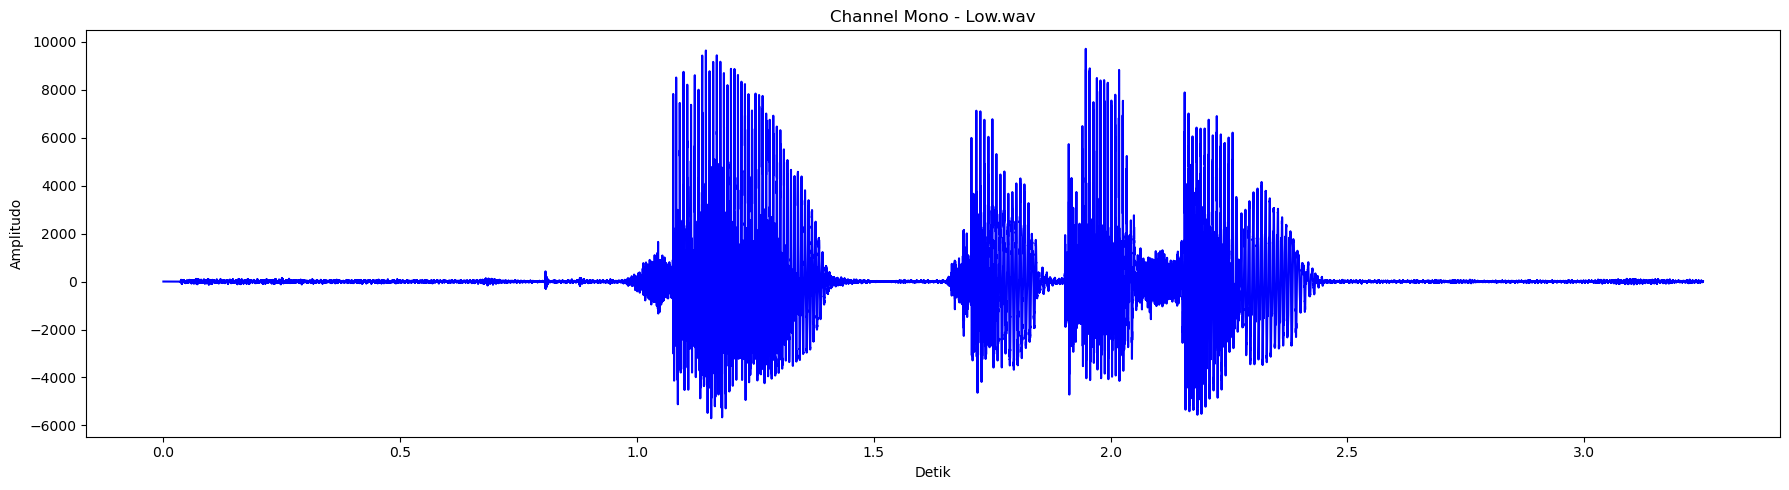

File: Medium.wav
Sample audio: 142336
Shape: (142336,)
----------------------------------------
Audio mono: [ 0  0  0 ... -8  4 -2]


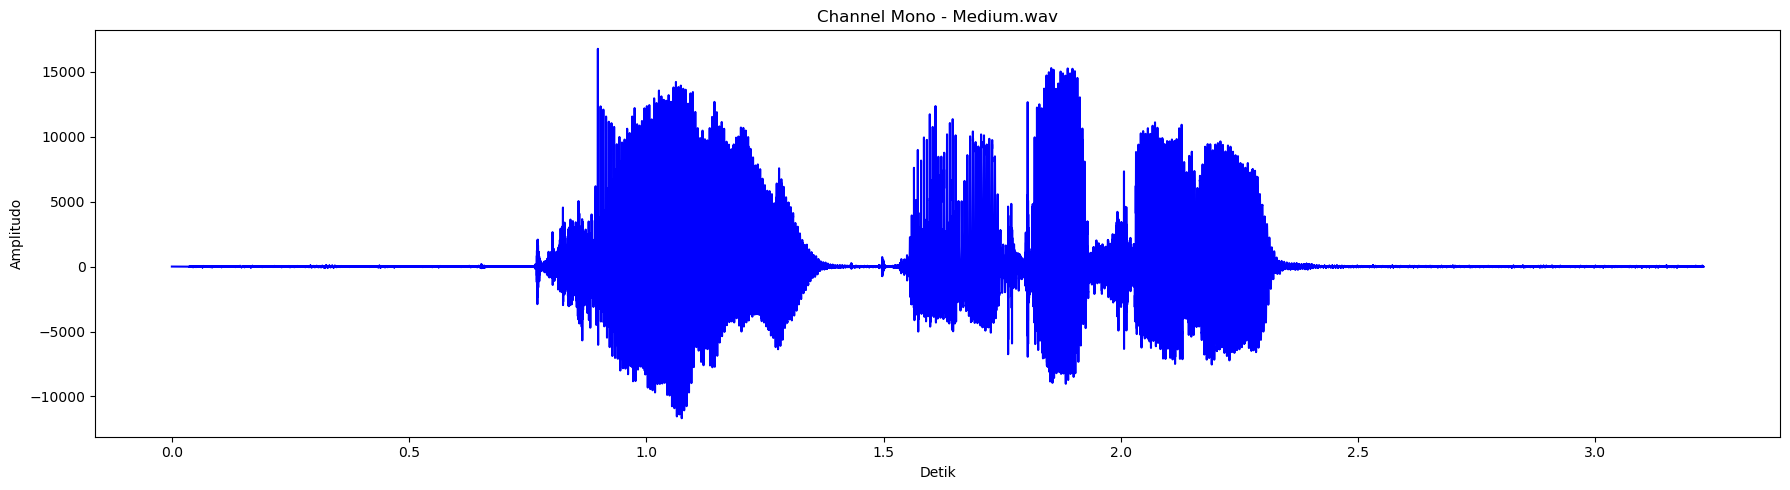

File: High.wav
Sample audio: 143360
Shape: (143360,)
----------------------------------------
Audio mono: [  0   0   0 ... -47 -49 -49]


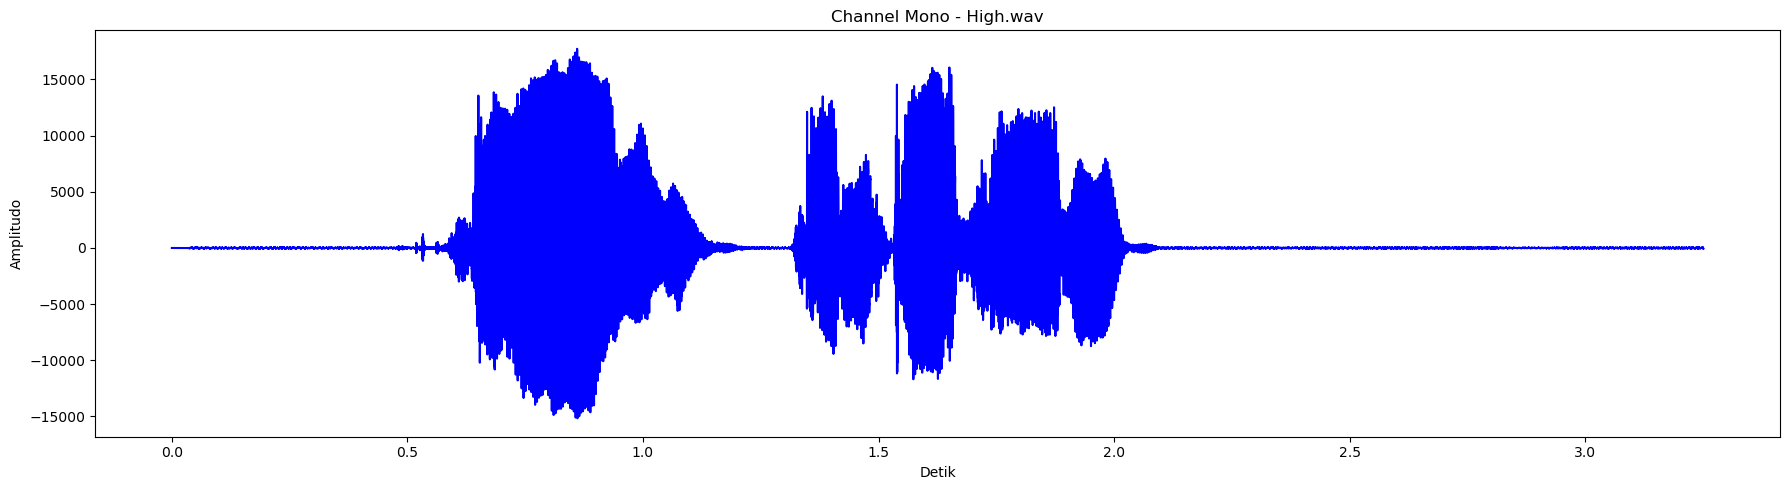

File: Brrbbrbrb.wav
Sample audio: 207872
Shape: (207872,)
----------------------------------------
Audio mono: [ 0  0  0 ... 24 29  9]


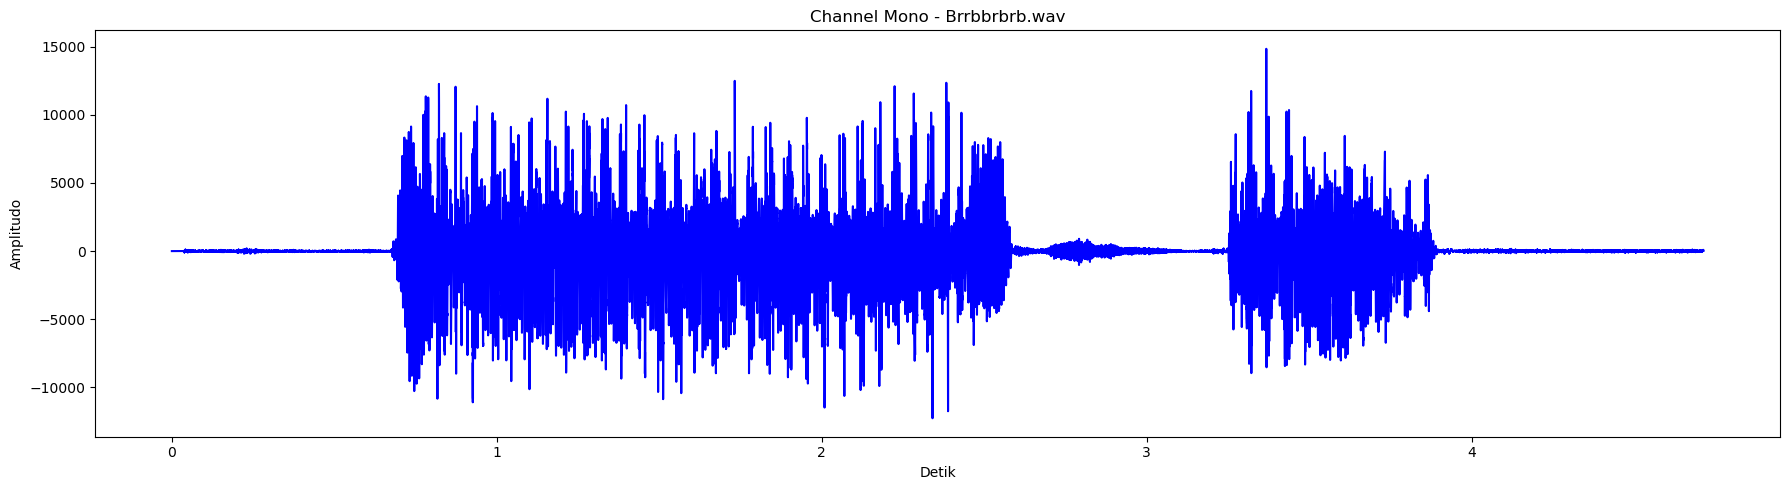

File: Esss.wav
Sample audio: 156672
Shape: (156672,)
----------------------------------------
Audio mono: [  0   0   0 ...  -6  -1 -15]


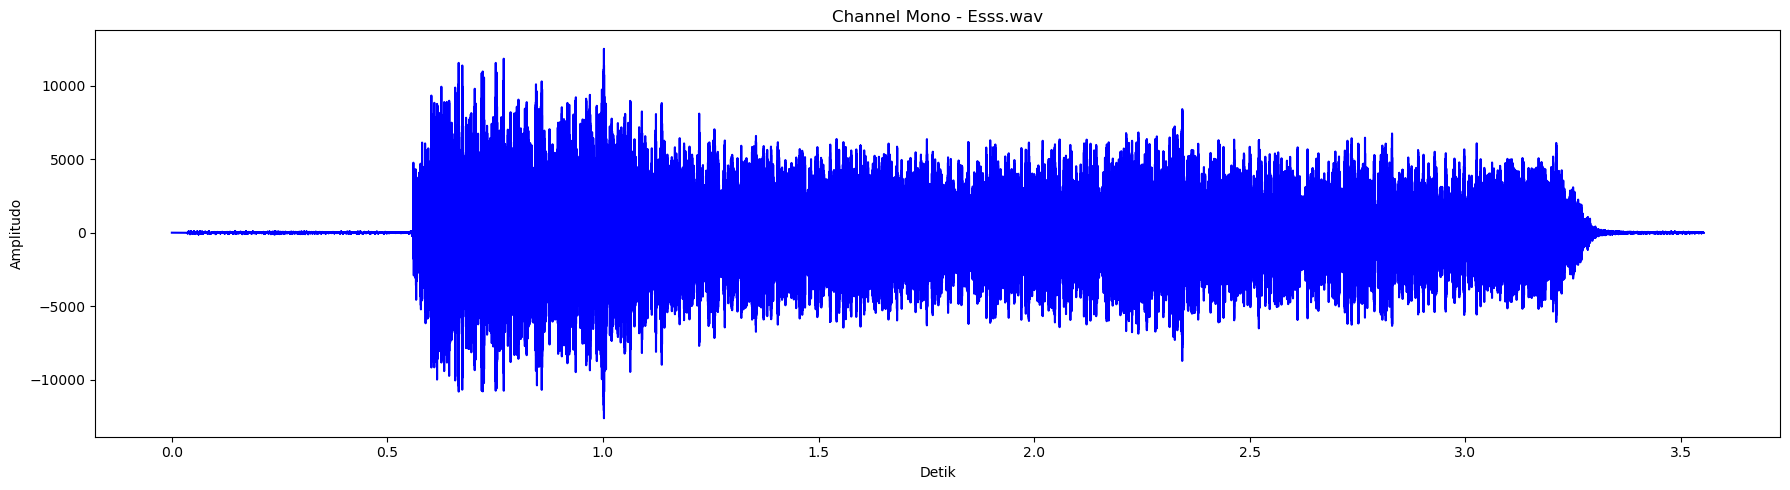

In [63]:
for audio_data in audio_data_list:
    with wave.open(audio_data, "r") as audio_wave:  # Open audio file
        audio_frames = audio_wave.readframes(-1)  # Read audio frames
        file_data = np.frombuffer(audio_frames, dtype="int16")  # Convert frames to numpy array
        sample_rate = audio_wave.getframerate()  # Get sample rate
        channels = audio_wave.getnchannels()  # Get number of channels

    if channels > 1:
        file_data = file_data.reshape(-1, channels)  # Reshape array if more than 1 channel

    sample_audio = len(file_data)  # Get length of audio data
    sumbu_waktu = np.linspace(0, sample_audio / sample_rate, sample_audio)  # Get time axis

    print(f"File: {os.path.basename(audio_data)}")
    print(f"Sample audio: {sample_audio}")  # Print sample audio length
    print(f"Shape: {file_data.shape}")  # Print shape of array
    print("-" * 40)  # Separator for readability

    if channels > 1:
        fig, ax = plt.subplots(2, 1, figsize=(18, 5))  # Create plot
        ax[0].plot(sumbu_waktu, file_data[:, 0], color="blue", label="left")  # Plot left channel
        ax[0].set_title(f"Channel Kiri - {os.path.basename(audio_data)}")  # Title plot
        ax[0].set_xlabel("Detik")  # Label x
        ax[0].set_ylabel("Amplitudo")  # Label y

        ax[1].plot(sumbu_waktu, file_data[:, 1], color="red", label="right")  # Plot right channel
        ax[1].set_title(f"Channel Kanan - {os.path.basename(audio_data)}")  # Title plot
        ax[1].set_xlabel("Detik")  # Label x
        ax[1].set_ylabel("Amplitudo")  # Label y

        print(f"Audio kiri: {file_data[:, 0]}")  # Print left channel data
        print(f"Audio kanan: {file_data[:, 1]}")  # Print right channel data
    else:
        plt.figure(figsize=(18, 5))  # Create plot
        plt.plot(sumbu_waktu, file_data, color="blue", label="mono")  # Plot mono channel
        plt.title(f"Channel Mono - {os.path.basename(audio_data)}")  # Title plot
        plt.xlabel("Detik")  # Label x
        plt.ylabel("Amplitudo")  # Label y

        print(f"Audio mono: {file_data}")  # Print mono channel data

    plt.tight_layout()  # Plot rapi
    plt.show()  # Menampilkan plot

4. Membuat visualisasi dalaman dari pada file audio tersebut. Masih sama dengan menggunakan `audio.wav`

File: Low.wav


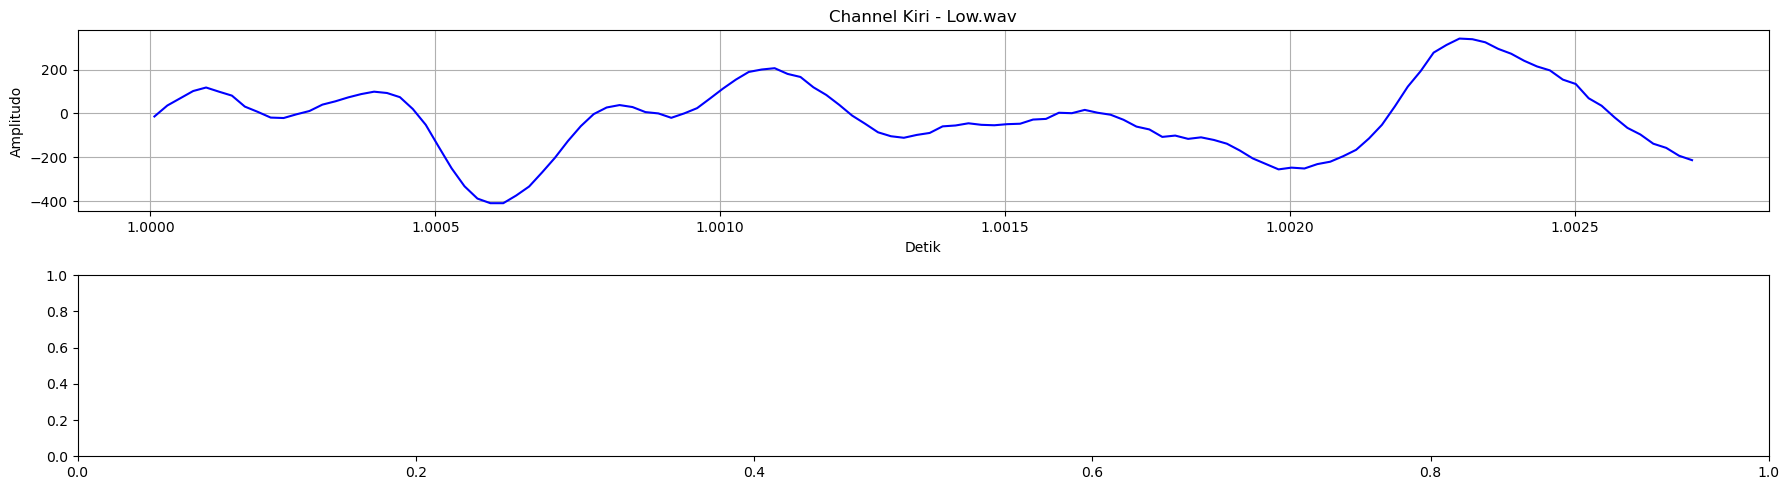

File: Medium.wav


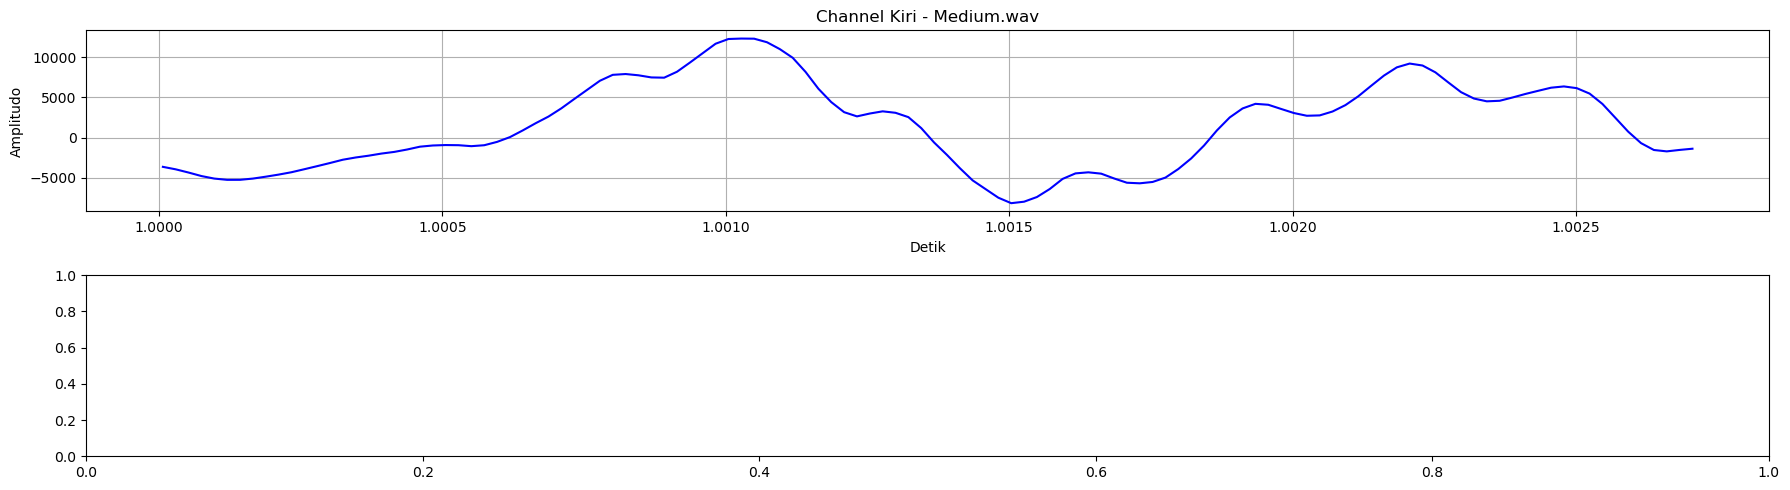

File: High.wav


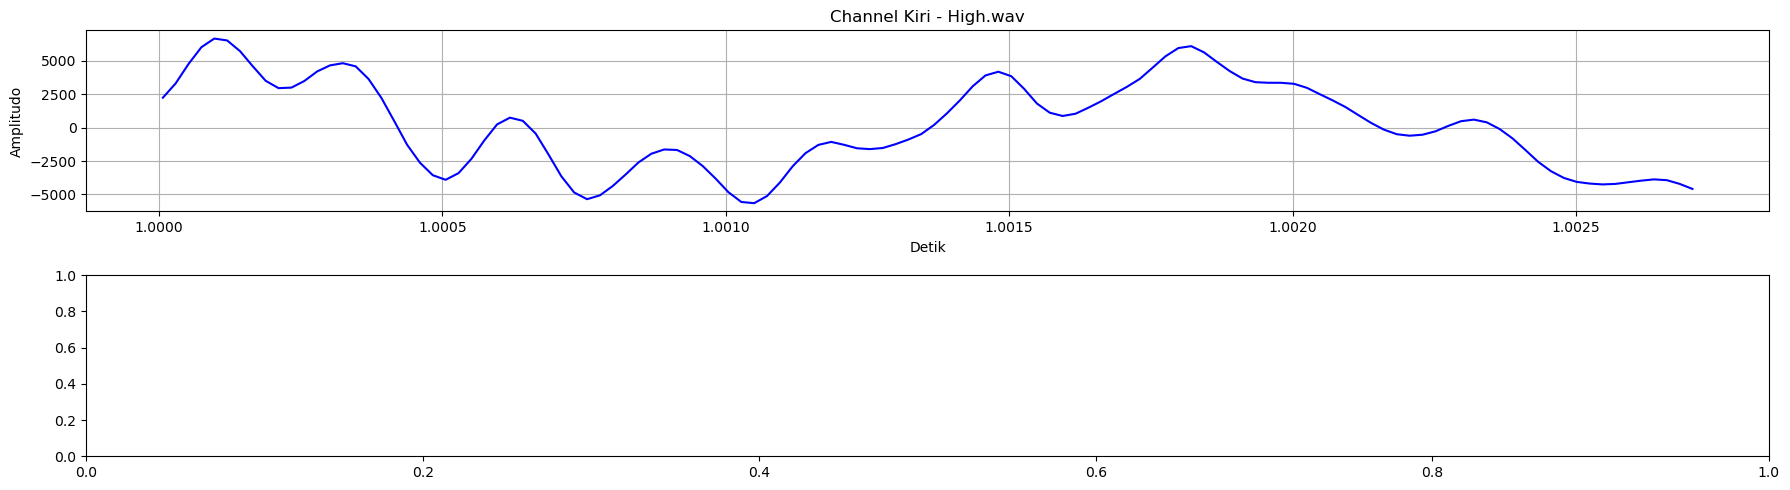

File: Brrbbrbrb.wav


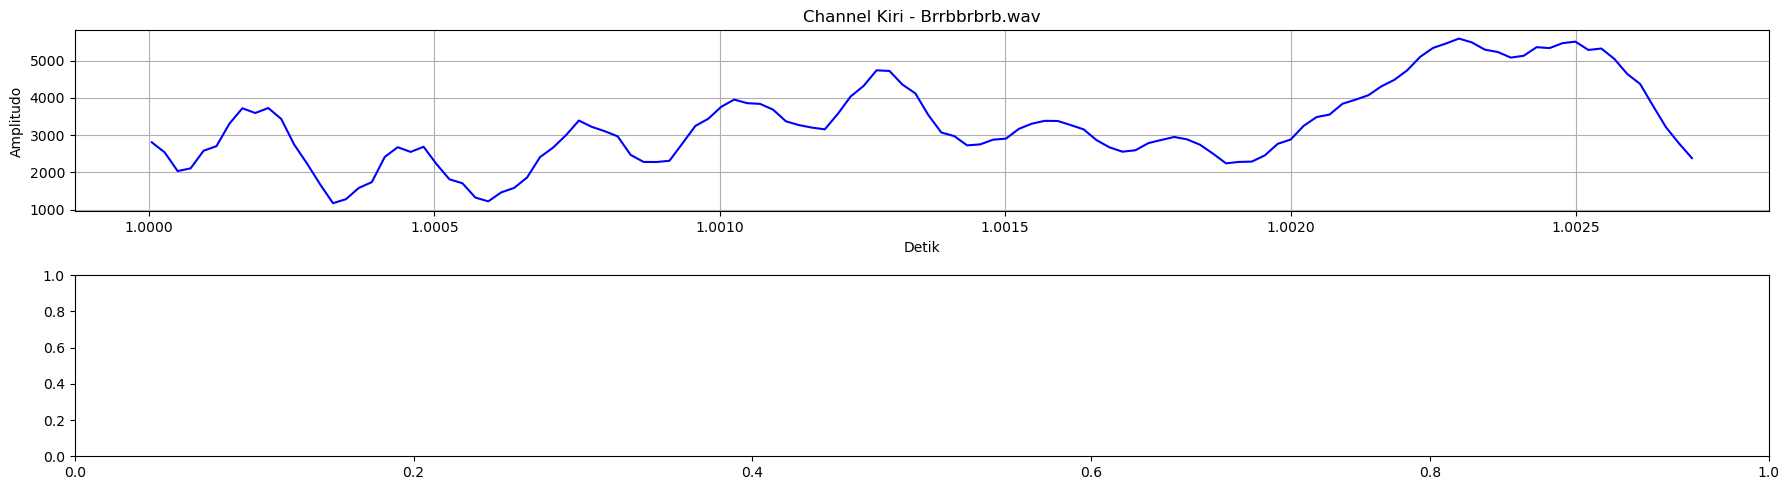

File: Esss.wav


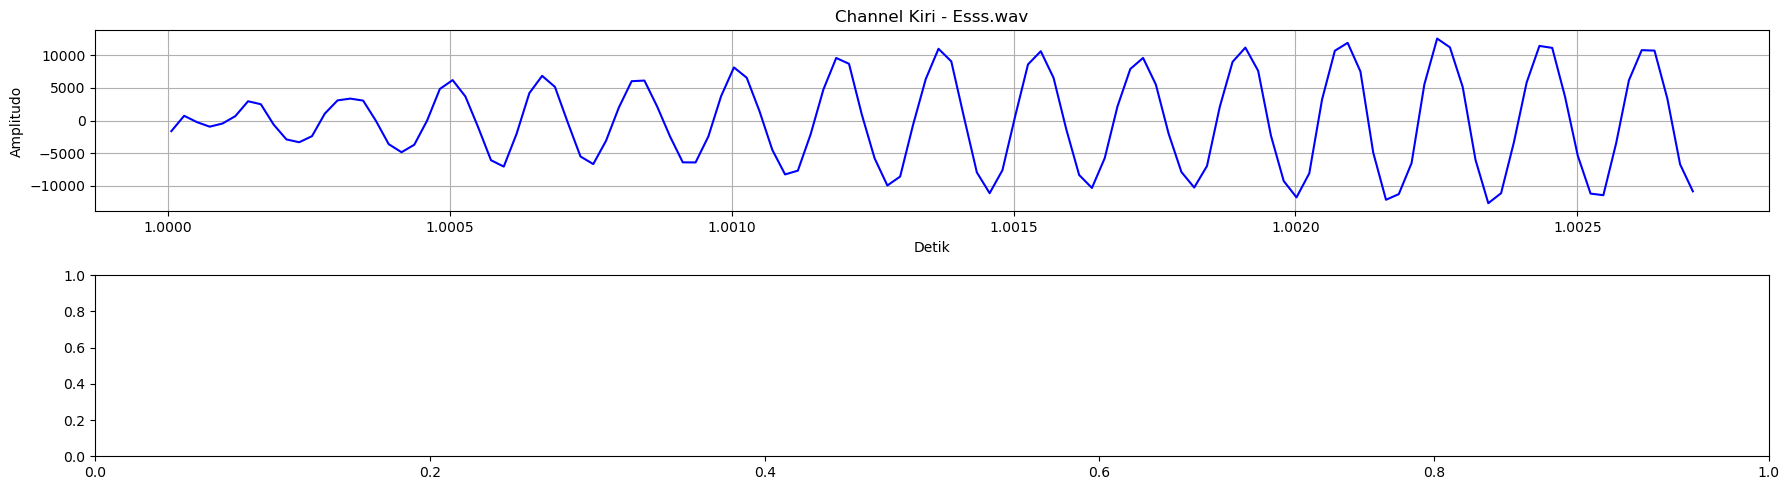

In [64]:
for audio_data in audio_data_list:
    with wave.open(audio_data, "r") as audio_wave:  # Open audio file
        audio_frames = audio_wave.readframes(-1)  # Read audio frames
        file_data = np.frombuffer(audio_frames, dtype="int16")  # Convert frames to numpy array
        sample_rate = audio_wave.getframerate()  # Get sample rate
        channels = audio_wave.getnchannels()  # Get number of channels

    file_data = file_data.reshape(-1, channels) if channels > 1 else file_data  # Reshape array if more than 1 channel

    sample_audio = len(file_data)  # Get length of audio data
    sumbu_waktu = np.linspace(0, sample_audio / sample_rate, sample_audio)  # Get time axis

    audio_kiri = file_data[:, 0] if channels > 1 else file_data  # Get left channel data
    audio_kanan = file_data[:, 1] if channels > 1 else None  # Get right channel data if available

    print(f"File: {os.path.basename(audio_data)}")
    ax, fig = plt.subplots(2, 1, figsize=(18, 5))  # Create plot
    fig[0].plot(sumbu_waktu[44100:44220], audio_kiri[44100:44220], color="blue", label="left")  # Plot left channel
    fig[0].set_title(f"Channel Kiri - {os.path.basename(audio_data)}")  # Title plot
    fig[0].set_xlabel("Detik")  # Label x
    fig[0].set_ylabel("Amplitudo")  # Label y
    fig[0].grid()  # Add grid

    if audio_kanan is not None:
        fig[1].plot(sumbu_waktu[44100:44220], audio_kanan[44100:44220], color="red", label="right")  # Plot right channel
        fig[1].set_title(f"Channel Kanan - {os.path.basename(audio_data)}")  # Title plot
        fig[1].set_xlabel("Detik")  # Label x
        fig[1].set_ylabel("Amplitudo")  # Label y
        fig[1].grid()  # Add grid

    plt.tight_layout()  # Plot rapi
    plt.show()  # Menampilkan plot

In [65]:
for audio_data in audio_data_list:
    with wave.open(audio_data, "r") as audio_wave:  # Open audio file
        audio_frames = audio_wave.readframes(-1)  # Read audio frames
        file_data = np.frombuffer(audio_frames, dtype="int16")  # Convert frames to numpy array
        sample_rate = audio_wave.getframerate()  # Get sample rate
        channels = audio_wave.getnchannels()  # Get number of channels

    file_data = file_data.reshape(-1, channels) if channels > 1 else file_data  # Reshape array if more than 1 channel

    audio_kiri = file_data[:, 0] if channels > 1 else file_data  # Get left channel data
    audio_kanan = file_data[:, 1] if channels > 1 else None  # Get right channel data if available

    print(f"File: {os.path.basename(audio_data)}")
    print(f"Data dari audio kiri adalah : {audio_kiri[44100:44220]}")  # Print left channel data
    if audio_kanan is not None:
        print(f"Data dari audio kanan adalah : {audio_kanan[44100:44220]}")  # Print right channel data
    else:
        print("Audio kanan: Tidak ada (mono audio)")  # Print message for no right channel
    print("-" * 40)  # Separator for readability


File: Low.wav
Data dari audio kiri adalah : [ -14   36   69  102  118   99   81   31    7  -19  -21   -4   11   40
   55   73   88   99   93   74   20  -52 -152 -250 -332 -388 -409 -409
 -374 -333 -269 -202 -126  -58   -3   27   38   29    6    0  -20    0
   24   68  113  154  189  200  206  180  166  119   84   39  -10  -47
  -86 -104 -111  -98  -89  -59  -55  -45  -52  -54  -49  -47  -28  -25
    3    1   16    3   -6  -29  -60  -73 -107 -101 -116 -109 -121 -138
 -169 -205 -230 -255 -247 -251 -231 -220 -195 -166 -114  -52   32  122
  193  277  312  341  338  324  294  272  240  214  196  154  134   69
   35  -18  -66  -96 -138 -157 -193 -213]
Audio kanan: Tidak ada (mono audio)
----------------------------------------
File: Medium.wav
Data dari audio kiri adalah : [-3648 -3958 -4359 -4796 -5111 -5268 -5265 -5112 -4875 -4616 -4321 -3946
 -3562 -3170 -2760 -2481 -2259 -1994 -1786 -1488 -1134  -986  -931  -950
 -1071  -954  -536    57   894  1788  2621  3644  4803  5943  7083  7822
  7

5. Membuat visualiasi spectogram dari audio yang telah disediakan. Audio dapat dicek pada `path` [Audio](Audio) 

In [66]:
import librosa  # pustaka librosa
import librosa.display  # pustaka librosa.display

In [67]:
audio_data = audio_data_list[3]  # mengambil data audio dari file Brrbbrbrb.wav

In [68]:
for audio_data in audio_data_list:
    audioS, sample_rate = librosa.load(audio_data)  # load data audio
    SA = librosa.stft(audioS)  # short-time Fourier transform
    SDB = librosa.amplitude_to_db(abs(SA))  # amplitude to decibel

    print(f"Audio file: {os.path.basename(audio_data)}")
    print(f"Sample rate: {sample_rate}")
    print(f"STFT shape: {SA.shape}")
    print(f"SDB shape: {SDB.shape}")
    print("-" * 40)  # Separator for readability

Audio file: Low.wav
Sample rate: 22050
STFT shape: (1025, 141)
SDB shape: (1025, 141)
----------------------------------------
Audio file: Medium.wav
Sample rate: 22050
STFT shape: (1025, 140)
SDB shape: (1025, 140)
----------------------------------------
Audio file: High.wav
Sample rate: 22050
STFT shape: (1025, 141)
SDB shape: (1025, 141)
----------------------------------------
Audio file: Brrbbrbrb.wav
Sample rate: 22050
STFT shape: (1025, 204)
SDB shape: (1025, 204)
----------------------------------------
Audio file: Esss.wav
Sample rate: 22050
STFT shape: (1025, 154)
SDB shape: (1025, 154)
----------------------------------------


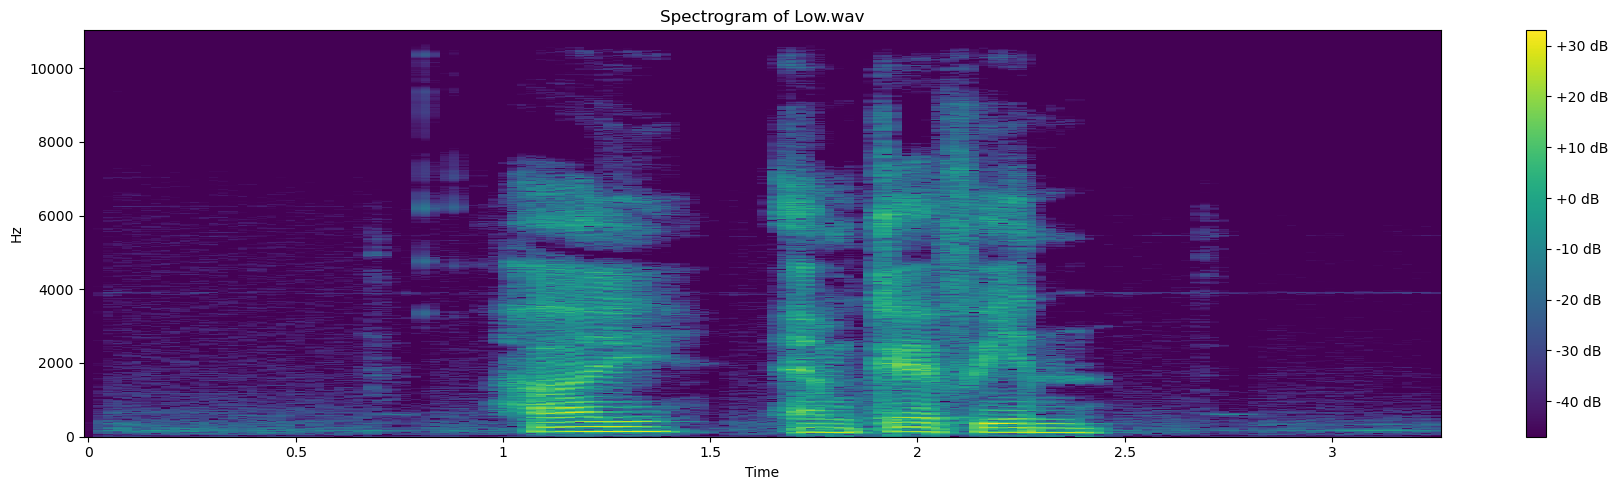

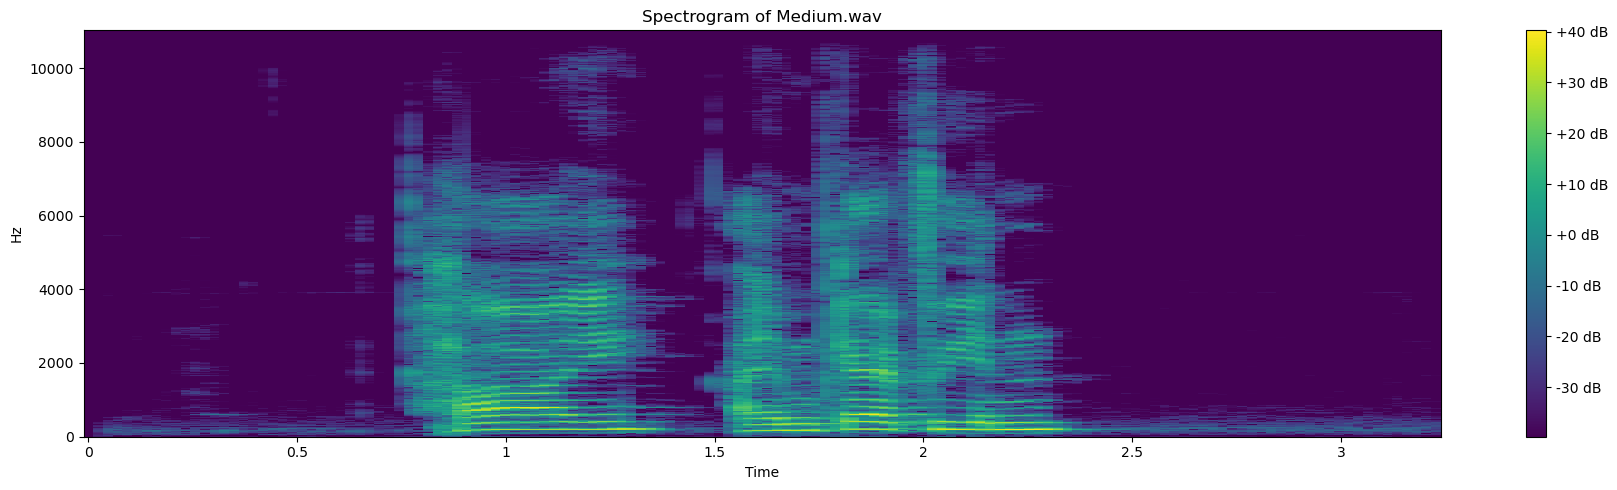

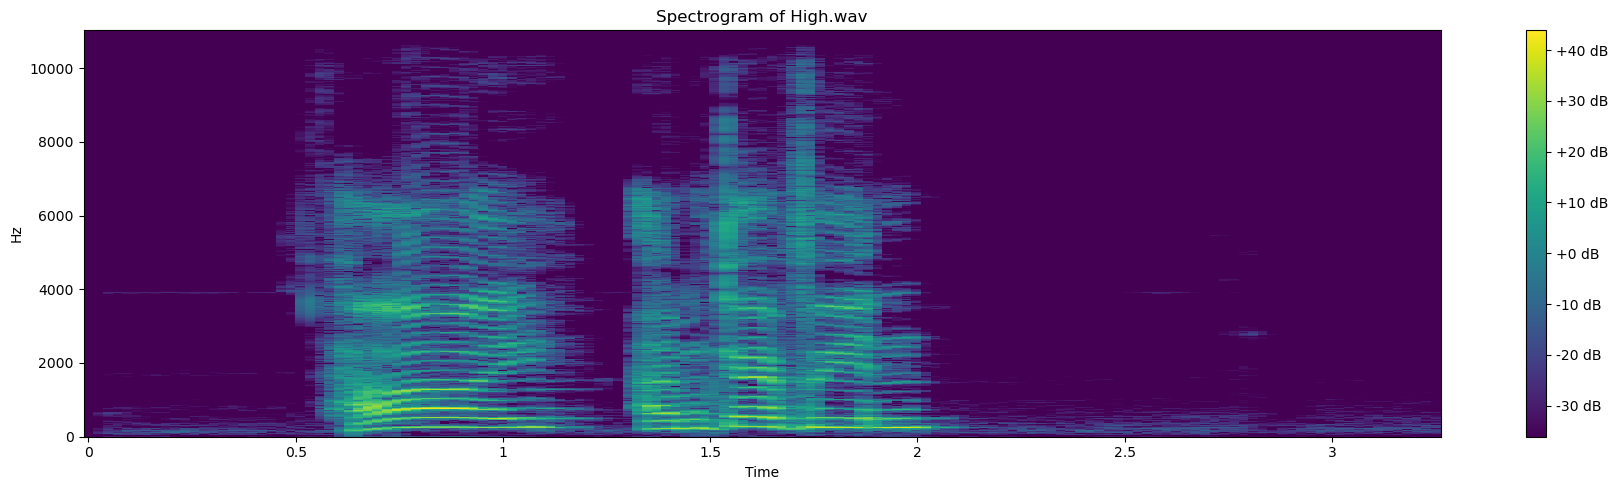

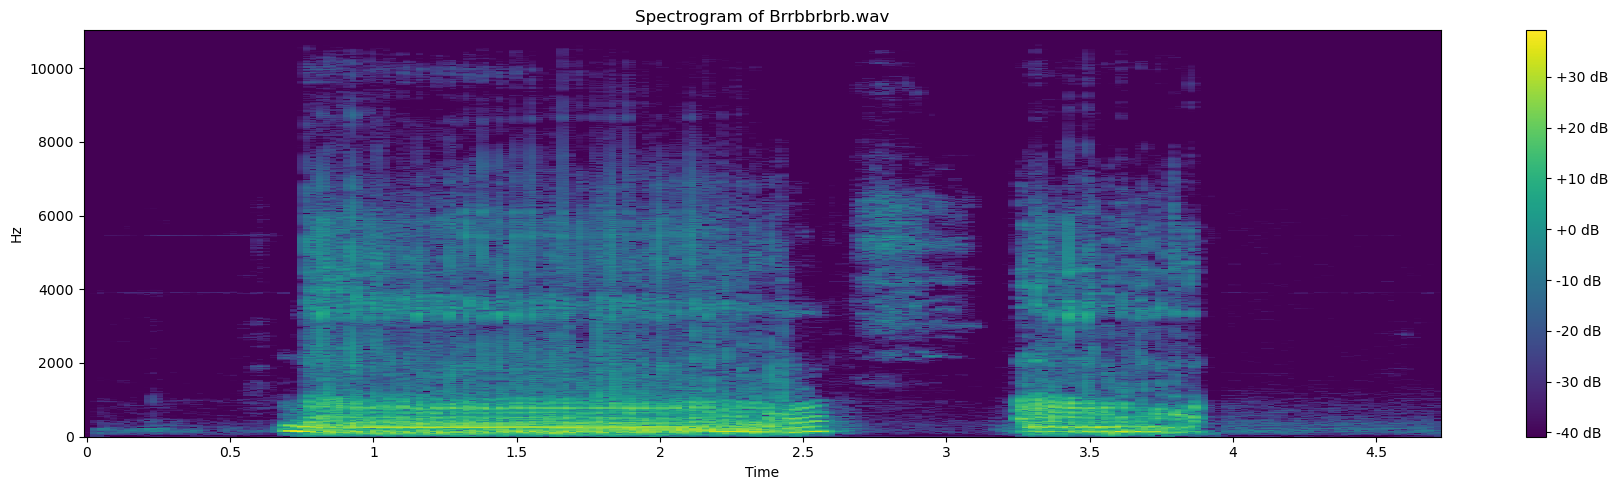

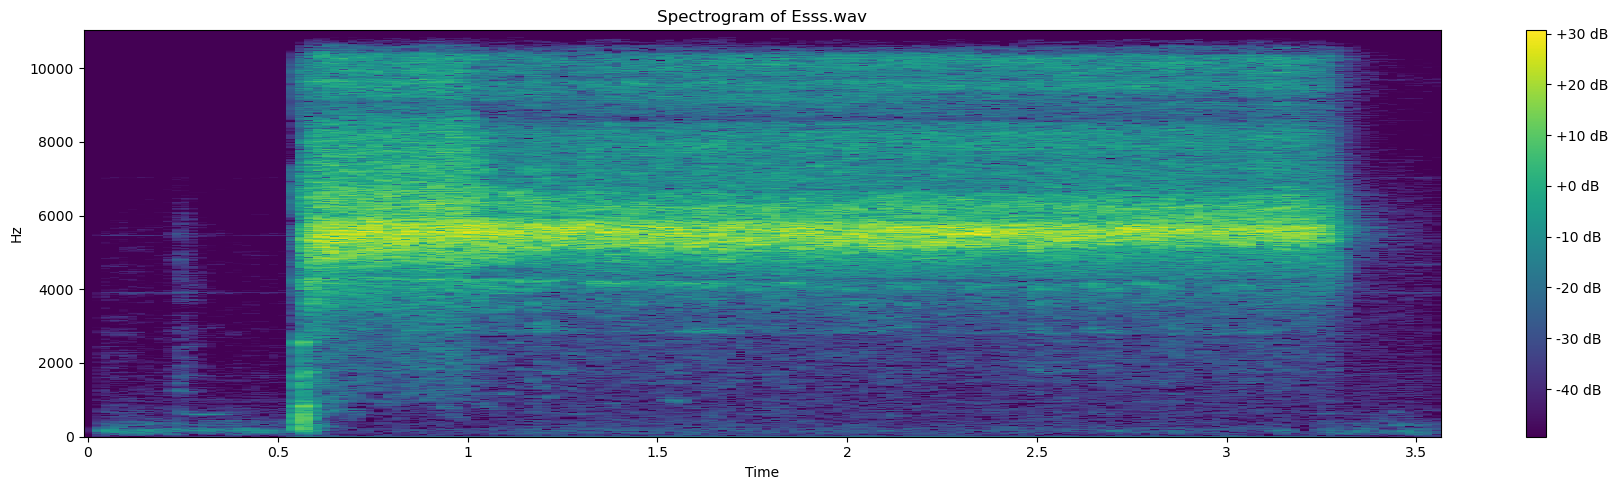

In [69]:
for audio_data in audio_data_list:
    # Load audio file
    audioS, sample_rate = librosa.load(audio_data)
    
    # Compute the short-time Fourier transform (STFT)
    SA = librosa.stft(audioS)
    
    # Convert the amplitude to decibels
    SDB = librosa.amplitude_to_db(abs(SA))
    
    # Plot the spectrogram
    plt.figure(figsize=(18, 5))
    librosa.display.specshow(SDB, sr=sample_rate, x_axis="time", y_axis="hz", cmap="viridis")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Spectrogram of {os.path.basename(audio_data)}")
    plt.tight_layout()
    plt.show()

6. Memotong audio dari data yang sudah ada menggunakan `wave`

In [70]:
with wave.open(audio_data, "r") as audio_wave:  # membuka file audio
    audio_frames = audio_wave.readframes(-1)  # membaca frame audio
    file_data = np.frombuffer(audio_frames, dtype="int16")  # mengubah frame ke array numpy
    sample_rate = audio_wave.getframerate()  # mengambil sample rate
    channels = audio_wave.getnchannels()  # mengambil jumlah channel

file_data = file_data.reshape(-1, channels)  # mengubah bentuk array
print(f"Shape dari file data yang baru: {file_data.shape}")  # menampilkan bentuk array
for audio_data in audio_data_list:
    with wave.open(audio_data, "r") as audio_wave:  # membuka file audio
        audio_frames = audio_wave.readframes(-1)  # membaca frame audio
        file_data = np.frombuffer(audio_frames, dtype="int16")  # mengubah frame ke array numpy
        sample_rate = audio_wave.getframerate()  # mengambil sample rate
        channels = audio_wave.getnchannels()  # mengambil jumlah channel

    file_data = file_data.reshape(-1, channels)  # mengubah bentuk array
    print(f"File: {os.path.basename(audio_data)}")
    print(f"Shape dari file data yang baru: {file_data.shape}")  # menampilkan bentuk array
    print("-" * 40)  # Separator for readability

Shape dari file data yang baru: (156672, 1)
File: Low.wav
Shape dari file data yang baru: (143360, 1)
----------------------------------------
File: Medium.wav
Shape dari file data yang baru: (142336, 1)
----------------------------------------
File: High.wav
Shape dari file data yang baru: (143360, 1)
----------------------------------------
File: Brrbbrbrb.wav
Shape dari file data yang baru: (207872, 1)
----------------------------------------
File: Esss.wav
Shape dari file data yang baru: (156672, 1)
----------------------------------------


In [71]:
for audio_data in audio_data_list:
    with wave.open(audio_data, "r") as audio_wave:  # Open audio file
        audio_frames = audio_wave.readframes(-1)  # Read audio frames
        file_data = np.frombuffer(audio_frames, dtype="int16")  # Convert frames to numpy array
        sample_rate = audio_wave.getframerate()  # Get sample rate
        channels = audio_wave.getnchannels()  # Get number of channels

    file_data = file_data.reshape(-1, channels) if channels > 1 else file_data  # Reshape array if more than 1 channel

    print(f"File: {os.path.basename(audio_data)}")
    if channels > 1:
        print(f"Isi dari audio sebelah kiri: {file_data[:, 0]}")  # Print left channel data
        print(f"Isi dari audio sebelah kanan: {file_data[:, 1]}")  # Print right channel data
    else:
        print(f"Isi dari audio sebelah kiri: {file_data}")  # Print left channel data
        print("Audio kanan: Tidak ada (mono audio)")  # Print message for no right channel
    print("-" * 40)  # Separator for readability

File: Low.wav
Isi dari audio sebelah kiri: [0 0 0 ... 3 4 6]
Audio kanan: Tidak ada (mono audio)
----------------------------------------
File: Medium.wav
Isi dari audio sebelah kiri: [ 0  0  0 ... -8  4 -2]
Audio kanan: Tidak ada (mono audio)
----------------------------------------
File: High.wav
Isi dari audio sebelah kiri: [  0   0   0 ... -47 -49 -49]
Audio kanan: Tidak ada (mono audio)
----------------------------------------
File: Brrbbrbrb.wav
Isi dari audio sebelah kiri: [ 0  0  0 ... 24 29  9]
Audio kanan: Tidak ada (mono audio)
----------------------------------------
File: Esss.wav
Isi dari audio sebelah kiri: [  0   0   0 ...  -6  -1 -15]
Audio kanan: Tidak ada (mono audio)
----------------------------------------


In [72]:
detik_titikawal = 5  # detik titik awal
detik_titikakhir = 10  # detik titik akhir

titikawal = detik_titikawal * sample_rate  # titik awal
titikakhir = detik_titikakhir * sample_rate  # titik akhir

print(f"Titik awal: {titikawal}")  # menampilkan titik awal
print(f"Titik akhir: {titikakhir}")  # menampilkan titik akhir 
for audio_data in audio_data_list:
    with wave.open(audio_data, "r") as audio_wave:  # Open audio file
        sample_rate = audio_wave.getframerate()  # Get sample rate

    titikawal = detik_titikawal * sample_rate  # titik awal
    titikakhir = detik_titikakhir * sample_rate  # titik akhir

    print(f"File: {os.path.basename(audio_data)}")
    print(f"Titik awal: {titikawal}")  # menampilkan titik awal
    print(f"Titik akhir: {titikakhir}")  # menampilkan titik akhir
    print("-" * 40)  # Separator for readability

Titik awal: 220500
Titik akhir: 441000
File: Low.wav
Titik awal: 220500
Titik akhir: 441000
----------------------------------------
File: Medium.wav
Titik awal: 220500
Titik akhir: 441000
----------------------------------------
File: High.wav
Titik awal: 220500
Titik akhir: 441000
----------------------------------------
File: Brrbbrbrb.wav
Titik awal: 220500
Titik akhir: 441000
----------------------------------------
File: Esss.wav
Titik awal: 220500
Titik akhir: 441000
----------------------------------------


In [73]:
trim_audio = file_data[titikawal:titikakhir]  # trim audio
sumbu_waktu_trim = sumbu_waktu[titikawal:titikakhir]  # sumbu waktu trim

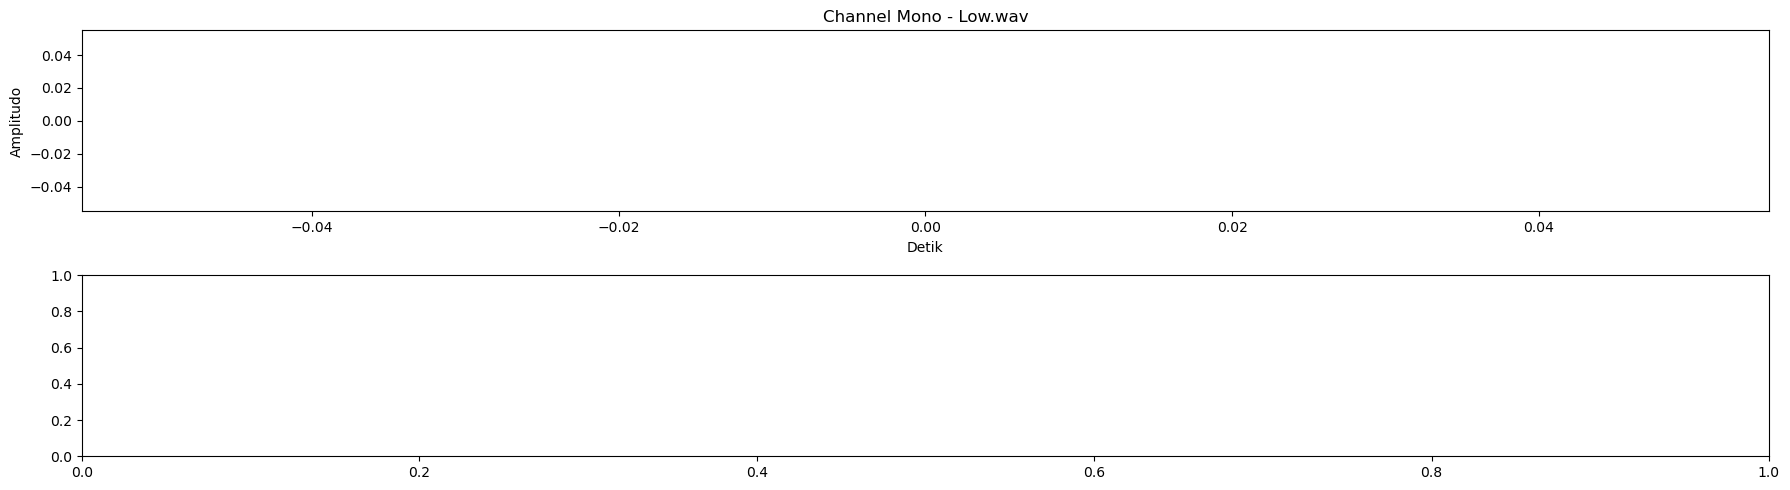

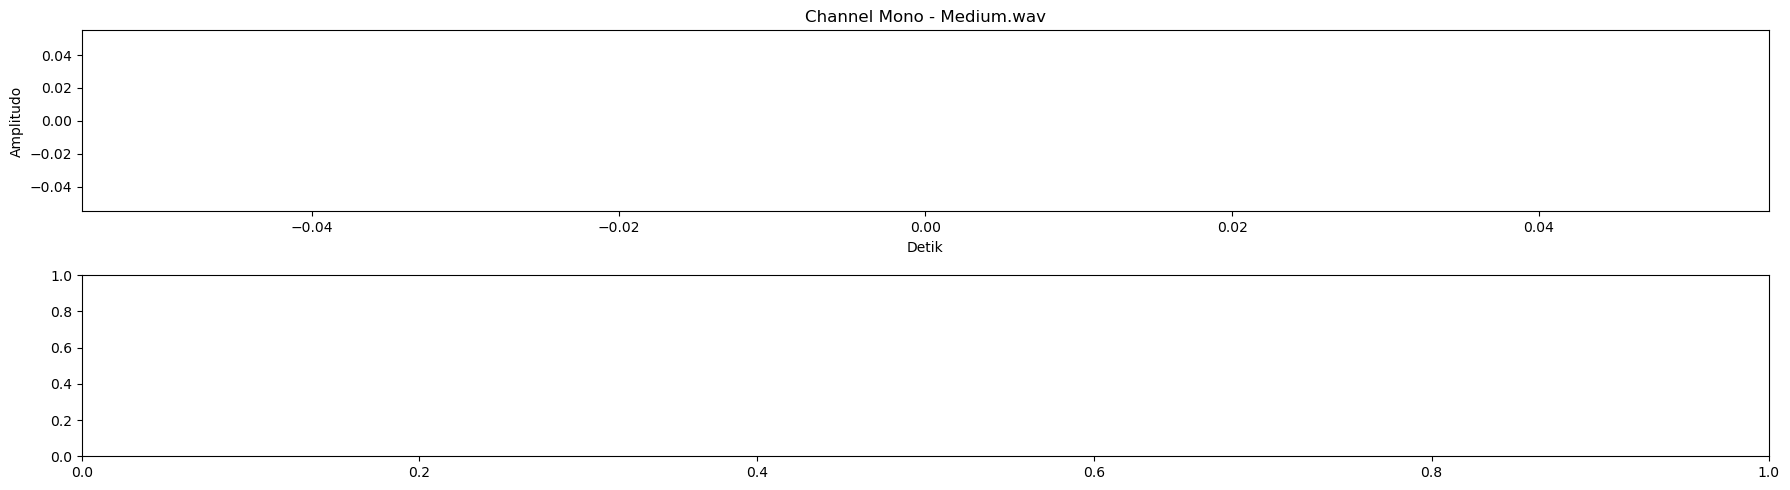

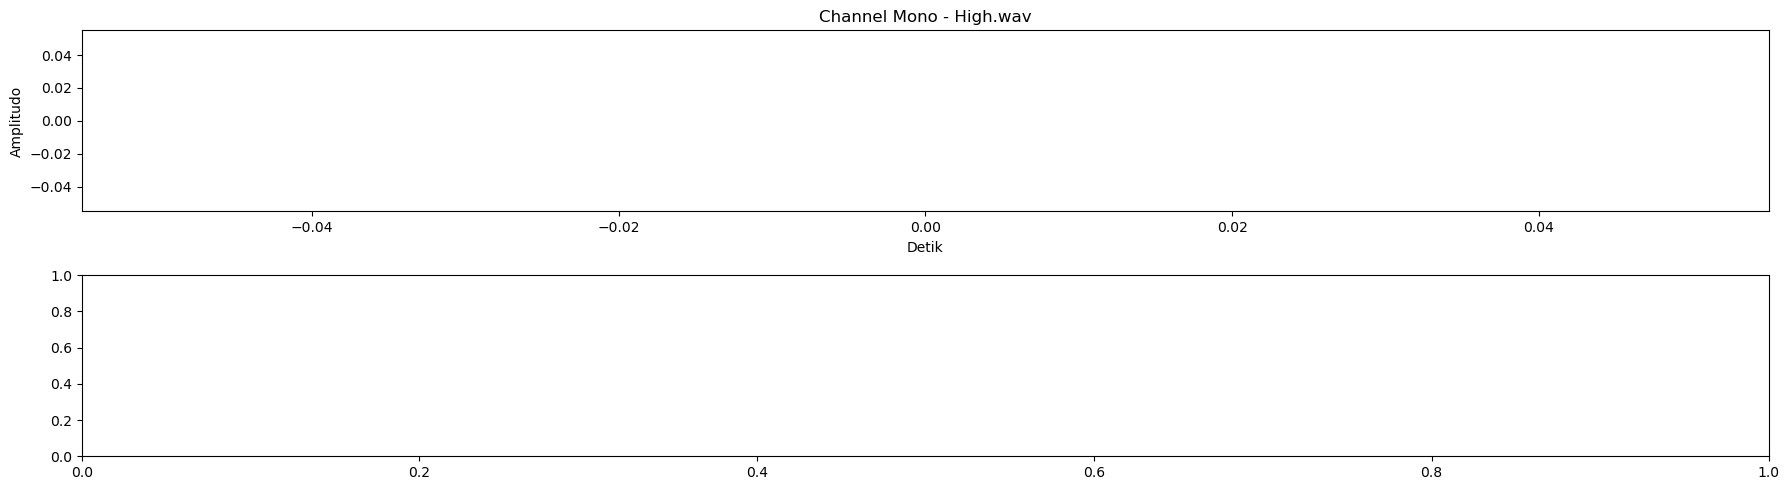

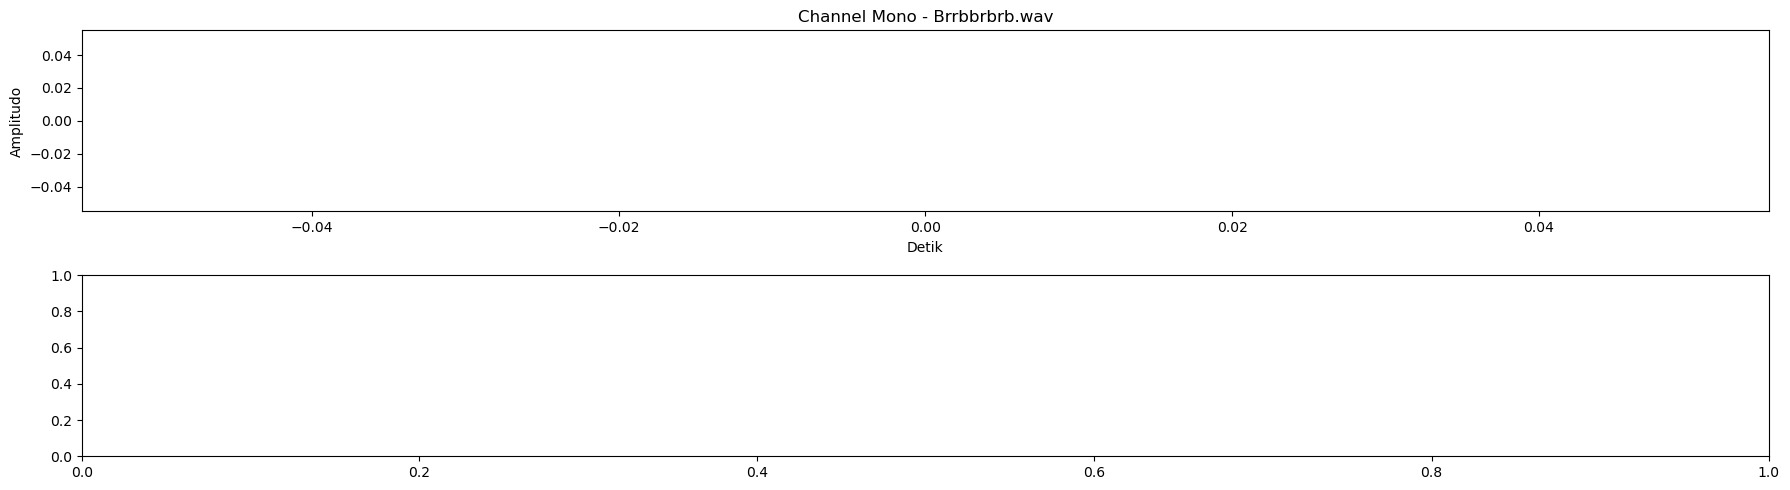

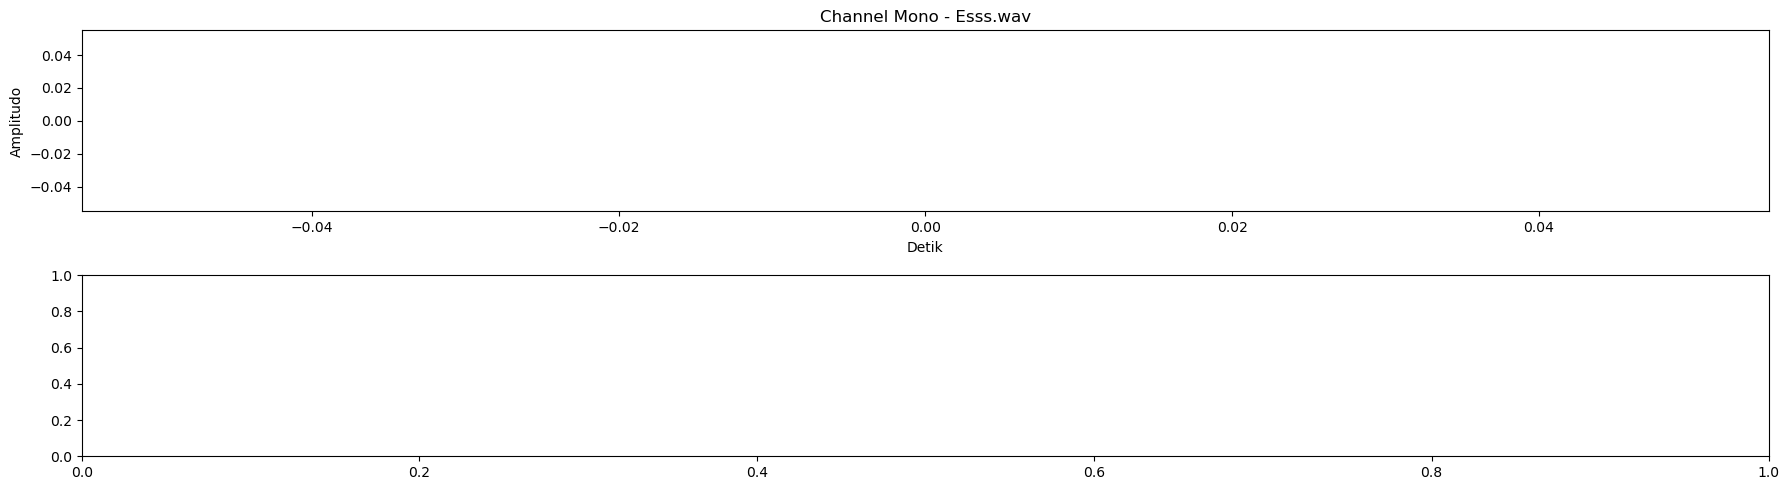

In [74]:
for audio_data in audio_data_list:
    with wave.open(audio_data, "r") as audio_wave:  # Open audio file
        audio_frames = audio_wave.readframes(-1)  # Read audio frames
        file_data = np.frombuffer(audio_frames, dtype="int16")  # Convert frames to numpy array
        sample_rate = audio_wave.getframerate()  # Get sample rate
        channels = audio_wave.getnchannels()  # Get number of channels

    file_data = file_data.reshape(-1, channels) if channels > 1 else file_data  # Reshape array if more than 1 channel

    detik_titikawal = 5  # detik titik awal
    detik_titikakhir = 10  # detik titik akhir

    titikawal = detik_titikawal * sample_rate  # titik awal
    titikakhir = detik_titikakhir * sample_rate  # titik akhir

    trim_audio = file_data[titikawal:titikakhir]  # Trim audio
    sumbu_waktu_trim = np.linspace(detik_titikawal, detik_titikakhir, len(trim_audio))  # Time axis for trimmed audio

    fig, ax = plt.subplots(2, 1, figsize=(18, 5))  # Create plot

    if channels > 1:  # Check if there is a right channel
        ax[0].plot(sumbu_waktu_trim, trim_audio[:, 0], color="blue", label="left")  # Plot left channel
        ax[0].set_title(f"Channel Kiri - {os.path.basename(audio_data)}")  # Title plot
        ax[0].set_xlabel("Detik")  # Label x
        ax[0].set_ylabel("Amplitudo")  # Label y

        ax[1].plot(sumbu_waktu_trim, trim_audio[:, 1], color="red", label="right")  # Plot right channel
        ax[1].set_title(f"Channel Kanan - {os.path.basename(audio_data)}")  # Title plot
        ax[1].set_xlabel("Detik")  # Label x
        ax[1].set_ylabel("Amplitudo")  # Label y
    else:
        ax[0].plot(sumbu_waktu_trim, trim_audio, color="blue", label="mono")  # Plot mono channel
        ax[0].set_title(f"Channel Mono - {os.path.basename(audio_data)}")  # Title plot
        ax[0].set_xlabel("Detik")  # Label x
        ax[0].set_ylabel("Amplitudo")  # Label y

    plt.tight_layout()  # Plot rapi
    plt.show()  # Menampilkan plot


## Mari Kita Analisis (MaKiAn)

1. Pengambilan Data Audio
Pada tahap ini, kita mengambil data audio dari beberapa file yang berada di folder `Audio`. Data audio ini kemudian dibaca menggunakan pustaka `wave` dan diubah menjadi array numpy untuk memudahkan proses selanjutnya.

2. Informasi Dasar Audio
Setelah data audio berhasil diambil, kita menampilkan beberapa informasi dasar seperti sample rate, jumlah channel, total frame, dan durasi audio. Dari informasi ini, kita mengetahui bahwa audio memiliki sample rate sebesar 44100 Hz dan hanya memiliki satu channel (mono audio).

3. Pemisahan Data Audio
Data audio yang telah diambil kemudian dipisahkan menjadi channel kiri dan kanan. Namun, karena audio ini hanya memiliki satu channel, maka hanya ada data untuk channel kiri.

4. Visualisasi Audio
Visualisasi audio dilakukan dengan membuat plot dari data audio terhadap waktu. Pada visualisasi ini, kita dapat melihat bagaimana bentuk gelombang audio dari channel kiri.

5. Visualisasi Detail Audio
Selain visualisasi umum, kita juga membuat visualisasi detail dari sebagian kecil data audio (dari detik ke 44100 hingga 44220). Visualisasi ini memberikan gambaran lebih detail mengenai bentuk gelombang audio pada interval waktu yang lebih kecil.

#### Kesimpulan
Dari hasil visualisasi dan analisis di atas, kita dapat melihat bahwa:
- Audio memiliki sample rate sebesar 44100 Hz dan hanya memiliki satu channel (mono audio).
- Bentuk gelombang audio dapat divisualisasikan dengan baik menggunakan pustaka `matplotlib`.
- Spektrogram memberikan informasi tambahan mengenai distribusi frekuensi dari audio.
- Pemotongan audio dapat dilakukan dengan mudah menggunakan pustaka `numpy` dan `wave`.

Visualisasi yang telah dibuat memberikan gambaran yang jelas mengenai karakteristik dari audio yang direkam, baik dalam domain waktu maupun frekuensi.

---


## What's The Problem?
2. Tanyalah kepada AI-LLM bagaimana membuat teknik fading yang non linear. Implementasikan hal tersebut. Jangan lupa copy/paste hasil percakapan anda dengan AI LLM ke notebook anda.
- Untuk mahasiswa ber-nim akhir ganjil, implementasikan teknik fading Logarithmic Scale Fading
- Untuk mahasiswa ber-nim akhir genap, implementasikan teknik fading Exponential
- Lakukan fading untuk bagian awal dan akhir dari audio

### Tahap Membuat Teknik Fading

### Dalam Hal Ini Mahasiswa Ber-NIM akhir Genap (12114015`0`)
1. Persiapkan library / pustaka yang menjadi kebutuhan dalam perkodingan ini. Dalam hal ini menginstall `numpy`, `librosa`, dan `soundfile`

In [75]:
import numpy as np #pustaka numpy
import librosa #pustaka librosa
import soundfile as sf #pustaka soundfile
import matplotlib.pyplot as plt #pustaka matplotlib
import os #pustaka os

2. Definisikan fungsi untuk mengubah audio ke format baru

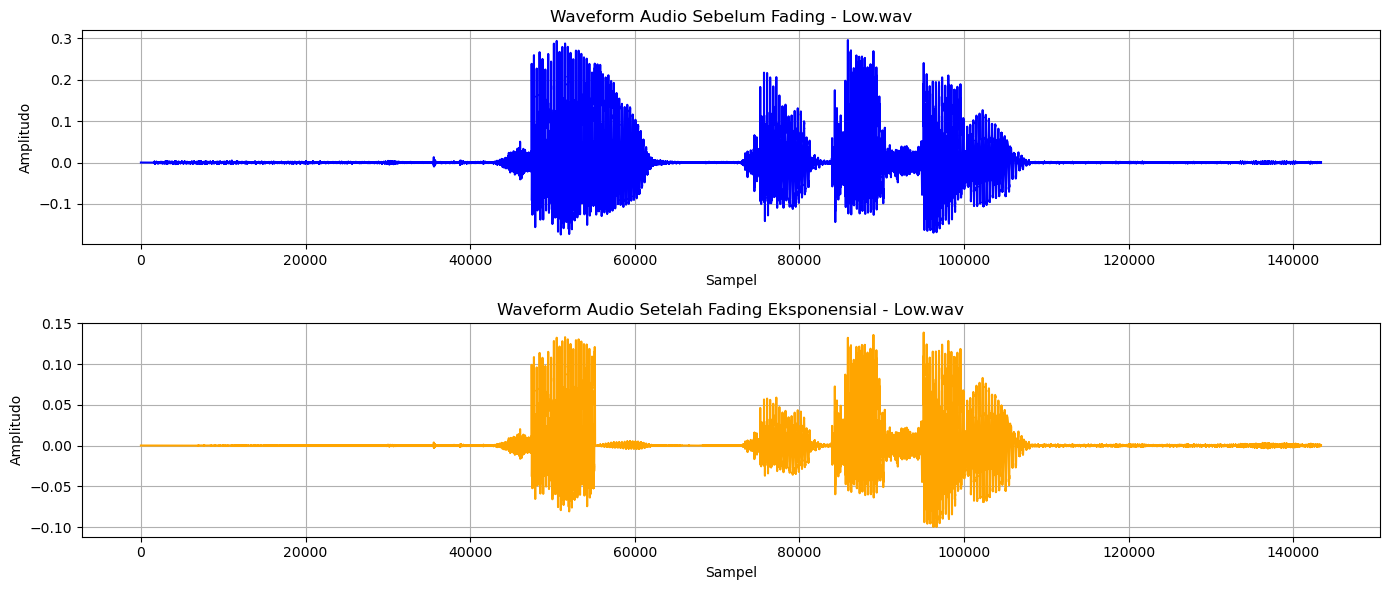

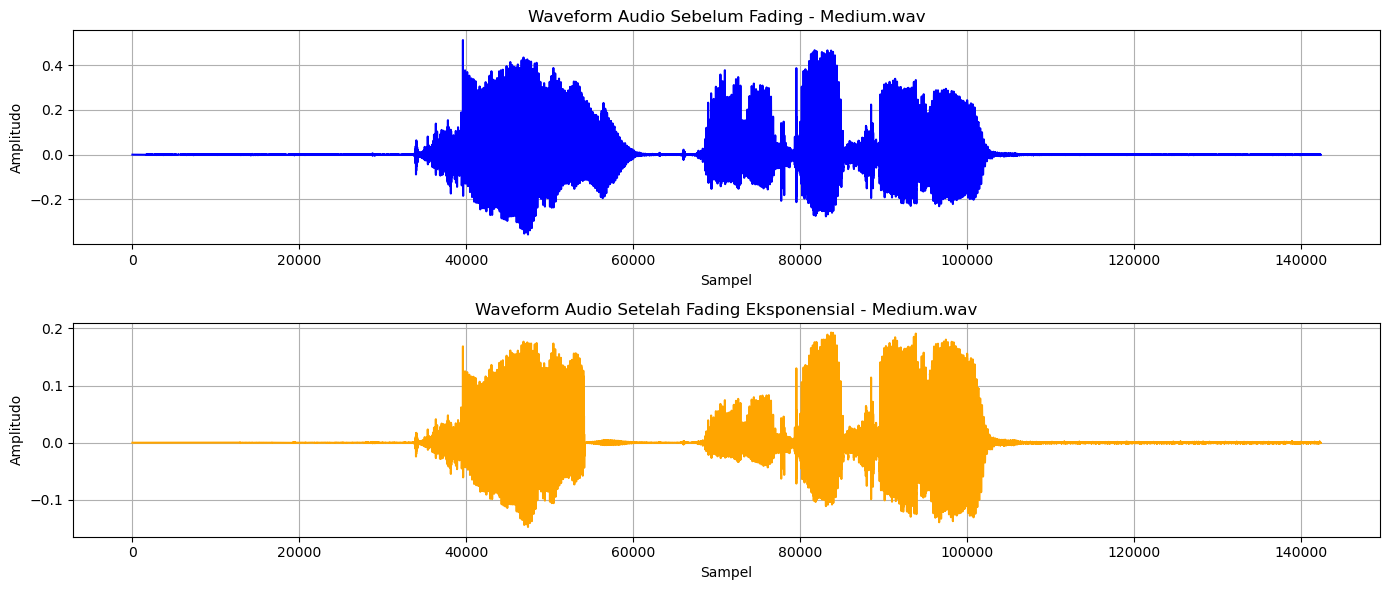

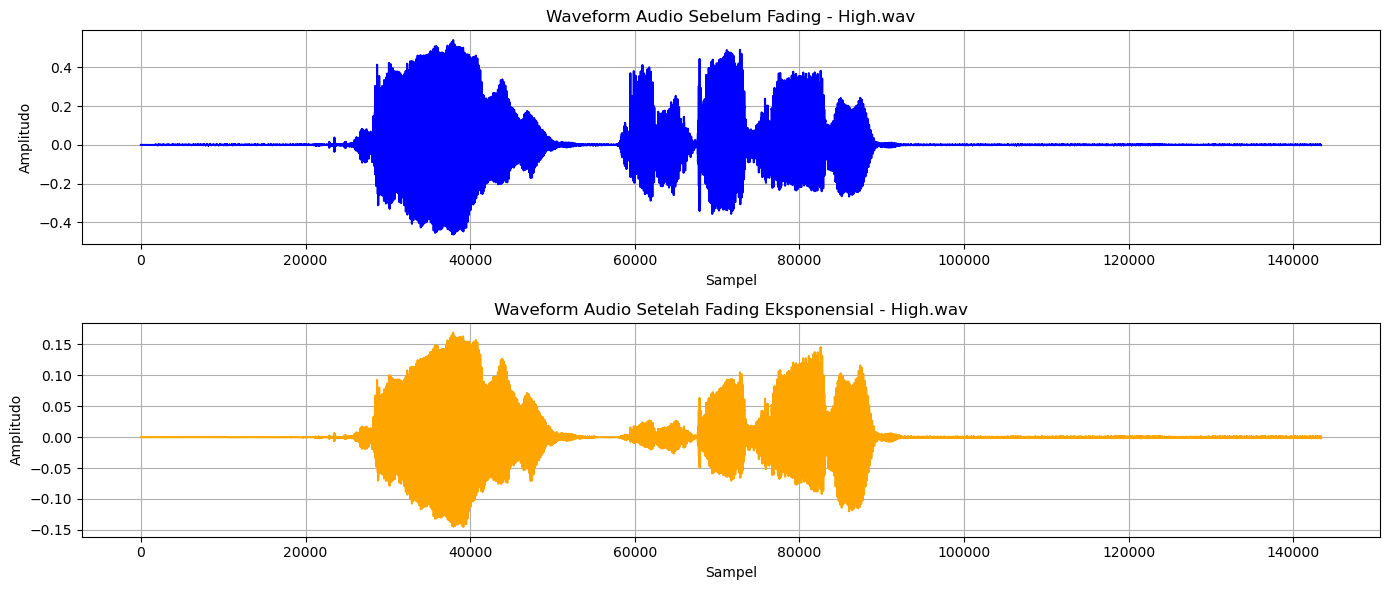

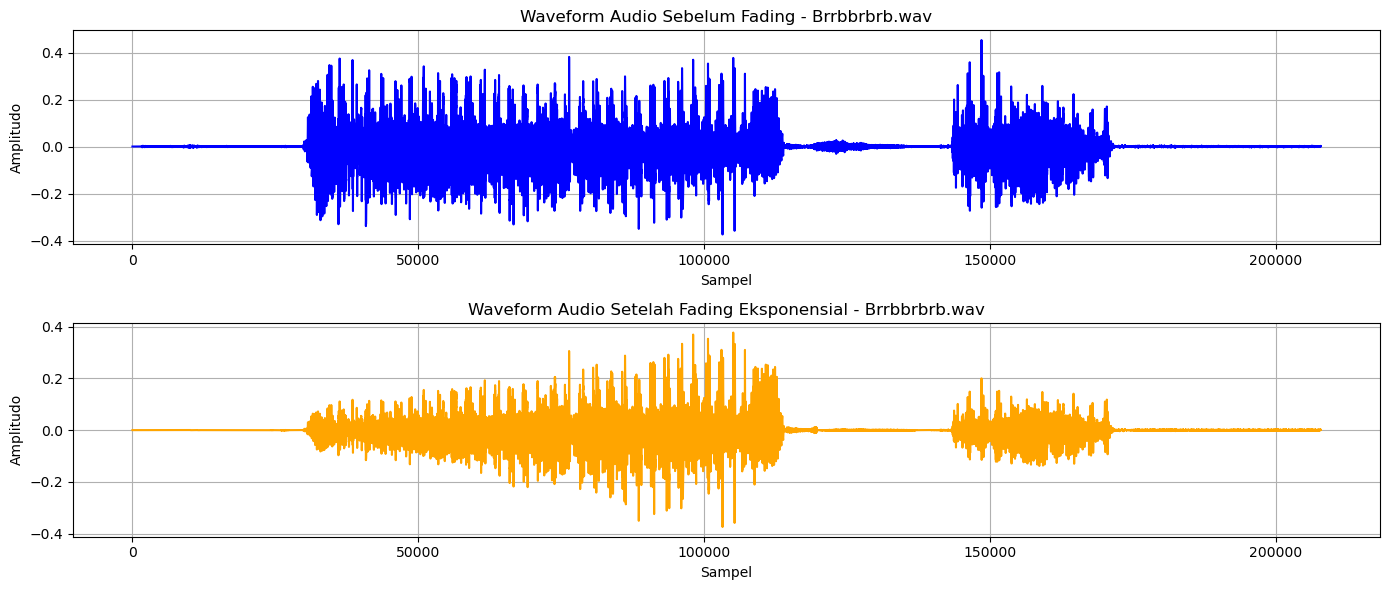

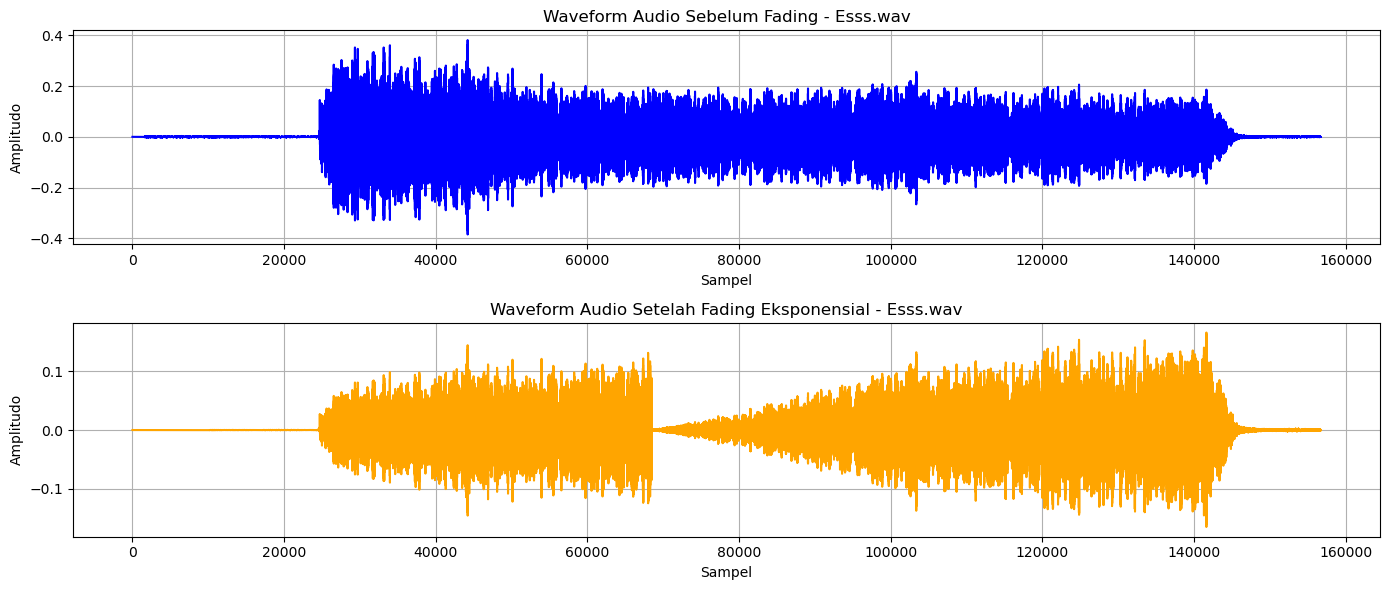

In [76]:
def apply_exponential_fade(audio_kiri, sample_rate, fade_duration):
    num_samples = len(audio_kiri)                # Total number of audio samples
    fade_length = int(fade_duration * sample_rate)   # Number of samples in the fade duration

    # Create a time array from 0 to 1
    t = np.linspace(0, 1, fade_length)

    # Calculate the exponential fade-in and fade-out
    fade_in = np.exp(t) - 1                  # Fade-in curve
    fade_out = 1 - np.exp(-t)                # Fade-out curve

    # Normalize the fades to range [0, 1]
    fade_in /= fade_in[-1]                   # Normalize to max 1
    fade_out /= fade_out[-1]                 # Normalize to max 1

    # Apply fade-in
    if fade_length < num_samples:
        audio_kiri[:fade_length] *= fade_in

    # Apply fade-out
    if fade_length < num_samples:
        audio_kiri[-fade_length:] *= fade_out

    return audio_kiri

fade_duration = 2.0  # Duration in seconds for the fade

for audio_data in audio_data_list:
    # Load the audio file
    audioS, sample_rate = librosa.load(audio_data, sr=None)  # Load audio file

    # Apply exponential fade
    faded_audio = apply_exponential_fade(audioS.copy(), sample_rate, fade_duration)

    # Visualize the audio before and after fading
    plt.figure(figsize=(14, 6))

    # Plot original audio
    plt.subplot(2, 1, 1)
    plt.plot(audioS, color='blue')
    plt.title(f'Waveform Audio Sebelum Fading - {os.path.basename(audio_data)}')
    plt.xlabel('Sampel')
    plt.ylabel('Amplitudo')
    plt.grid()

    # Plot faded audio
    plt.subplot(2, 1, 2)
    plt.plot(faded_audio, color='orange')
    plt.title(f'Waveform Audio Setelah Fading Eksponensial - {os.path.basename(audio_data)}')
    plt.xlabel('Sampel')
    plt.ylabel('Amplitudo')
    plt.grid()

    plt.tight_layout()
    plt.show()


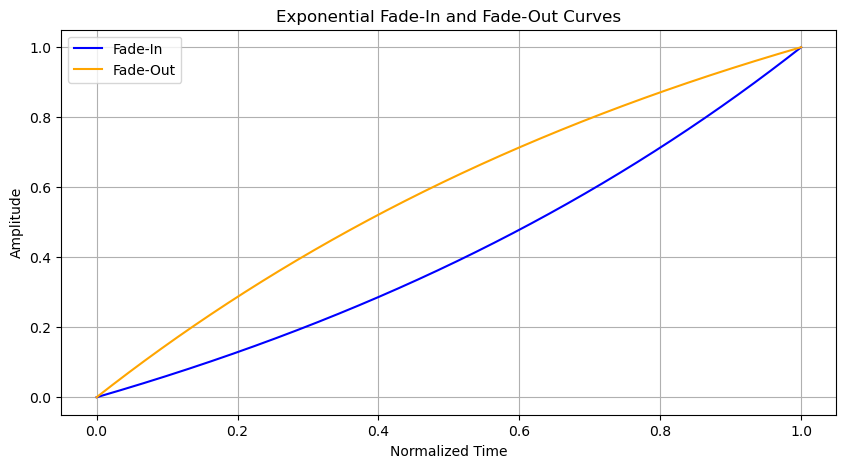

In [77]:
def plot_exponential_fade(fade_duration, sample_rate):
    fade_length = int(fade_duration * sample_rate)  # Number of samples in the fade duration

    # Create a time array from 0 to 1
    t = np.linspace(0, 1, fade_length)

    # Calculate the exponential fade-in and fade-out
    fade_in = np.exp(t) - 1  # Fade-in curve
    fade_out = 1 - np.exp(-t)  # Fade-out curve

    # Normalize the fades to range [0, 1]
    fade_in /= fade_in[-1]  # Normalize to max 1
    fade_out /= fade_out[-1]  # Normalize to max 1

    # Plot the fade-in and fade-out curves
    plt.figure(figsize=(10, 5))
    plt.plot(t, fade_in, label="Fade-In", color="blue")
    plt.plot(t, fade_out, label="Fade-Out", color="orange")
    plt.title("Exponential Fade-In and Fade-Out Curves")
    plt.xlabel("Normalized Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
fade_duration = 2.0  # Duration in seconds for the fade
sample_rate = 44100  # Sample rate in Hz
plot_exponential_fade(fade_duration, sample_rate)

### Mari Kita Analisis (MaKiAn)

Pada tahap ini, kita telah mengimplementasikan teknik fading eksponensial pada audio. Teknik ini melibatkan penerapan kurva eksponensial untuk mengubah amplitudo audio secara bertahap pada awal dan akhir audio. Berikut adalah analisis dari teknik fading yang telah diterapkan:

1. **Kurva Fading Eksponensial**:
    - Kurva fading eksponensial memiliki bentuk yang khas, di mana amplitudo meningkat secara eksponensial pada fade-in dan menurun secara eksponensial pada fade-out.
    - Kurva fade-in dimulai dari 0 dan meningkat hingga 1, sedangkan kurva fade-out dimulai dari 1 dan menurun hingga 0.
    - Kurva ini memberikan transisi yang lebih halus dibandingkan dengan linear fading, terutama pada bagian awal dan akhir audio.

2. **Implementasi Fading**:
    - Fading diterapkan pada audio dengan durasi fade yang ditentukan (misalnya 2 detik).
    - Pada bagian awal audio, amplitudo meningkat secara eksponensial dari 0 hingga nilai maksimum dalam durasi fade.
    - Pada bagian akhir audio, amplitudo menurun secara eksponensial dari nilai maksimum hingga 0 dalam durasi fade.

3. **Visualisasi Audio Sebelum dan Sesudah Fading**:
    - Visualisasi audio sebelum fading menunjukkan amplitudo asli dari audio.
    - Visualisasi audio setelah fading menunjukkan perubahan amplitudo pada bagian awal dan akhir audio sesuai dengan kurva eksponensial.
    - Perubahan ini terlihat jelas pada plot, di mana amplitudo meningkat secara bertahap pada awal dan menurun secara bertahap pada akhir.

4. **Keuntungan Teknik Fading Eksponensial**:
    - Teknik ini memberikan transisi yang lebih alami dan halus dibandingkan dengan linear fading.
    - Mengurangi kemungkinan adanya klik atau noise pada awal dan akhir audio yang sering terjadi pada linear fading.
    - Cocok untuk aplikasi yang membutuhkan transisi audio yang halus, seperti dalam produksi musik atau editing audio.

5. **Kesimpulan**:
    - Teknik fading eksponensial efektif dalam memberikan transisi yang halus pada audio.
    - Implementasi dan visualisasi menunjukkan bahwa teknik ini dapat diterapkan dengan mudah menggunakan pustaka `numpy` dan `librosa`.
    - Kurva eksponensial memberikan hasil yang lebih baik dibandingkan dengan linear fading dalam hal kehalusan transisi.

---

## What's The Problem?
3. Dengan menggunakan file audio yang anda rekam sendiri (suara anda), lakukanlah kompresi dan normalisasi hingga loudness LUFS mencapai kira-kira sekitar -14 LUFS. Berikan penjelasan langkah-langkah yang anda lakukan untuk menyelesaikan tugas ini.

### Normalisasi Audio `kevins.wav`

In [114]:
audio_data3 = os.path.join(os.getcwd(), "Audio", "Kevins.wav")  # Load audio file

with wave.open(audio_data3, "r") as audio_wave:  # Open audio file
    audio_width = audio_wave.getsampwidth()  # Get sample width
    audio_sample = audio_wave.getnframes()  # Get number of frames
    audio_frames = audio_wave.readframes(audio_sample)  # Read audio frames
    file_data = np.frombuffer(audio_frames, dtype="int16")  # Convert frames to numpy array
    sample_rate = audio_wave.getframerate()  # Get sample rate
    channels = audio_wave.getnchannels()  # Get number of channels

In [115]:
print(f"File: {os.path.basename(audio_data3)}")
print(f"Sample rate: {sample_rate} Hz")  # Display sample rate
print(f"Long Audio: {audio_sample}")  # Display number of channels

File: Kevins.wav
Sample rate: 44100 Hz
Long Audio: 300032


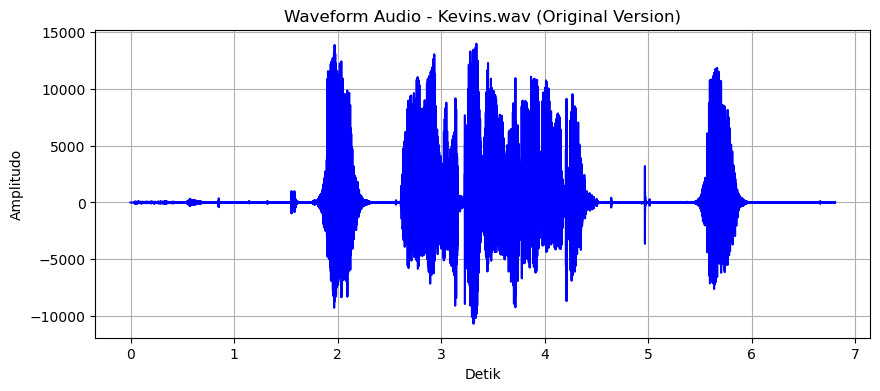

In [116]:
sumbu_waktu = np.linspace(0, audio_sample / sample_rate, audio_sample)  # Get time axis
plt.figure(figsize=(10, 4))  # Create plot
plt.plot(sumbu_waktu, file_data, color="blue")  # Plot audio data
plt.title(f"Waveform Audio - {os.path.basename(audio_data3)} (Original Version)")  # Title plot
plt.xlabel("Detik")  # Label x
plt.ylabel("Amplitudo")  # Label y
plt.grid()  # Add grid
plt.show()  # Menampilkan plot

In [117]:
# Calculate the maximum value and threshold
max_value = np.max(np.abs(file_data))
threshold = 0.2 * max_value

# Print the values
print(f"Maximum value of SDB: {max_value}")
print(f"Threshold value of SDB: {threshold}")

Maximum value of SDB: 13976
Threshold value of SDB: 2795.2000000000003


In [118]:
compressed_audio = np.copy(file_data)  # Copy the audio data
mask_audio = np.abs(compressed_audio) > threshold  # Create a mask for values below the threshold
print(f"Sampel Kompresi Berjumlah : {np.sum(mask_audio)}")  # Print the number of samples to be compressed

Sampel Kompresi Berjumlah : 26509


In [119]:
ratio = 7  # Compression ratio
compressed_audio[mask_audio] = threshold + (compressed_audio[mask_audio] - threshold) * ratio  # Compress the audio data    
compressed_audio = np.clip(compressed_audio, -max_value, max_value)  # Clip the compressed audio data   

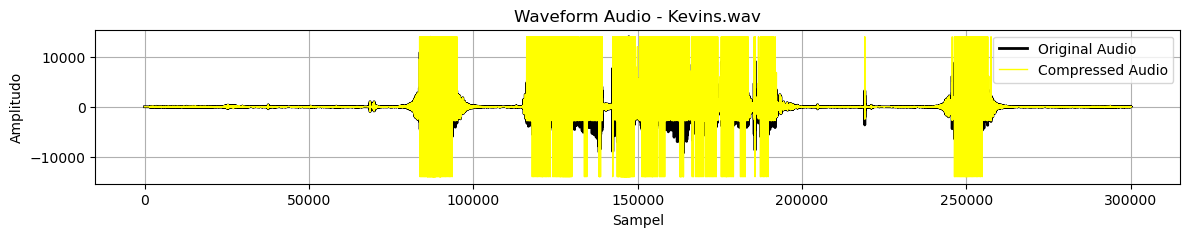

In [121]:
# Plot the original and compressed waveforms
plt.figure(figsize=(14, 2))

# Plot original audio
plt.plot(file_data, color='black', label='Original Audio', linewidth=2)  # Increase line width
plt.title(f'Waveform Audio - {os.path.basename(audio_data3)}')
plt.xlabel('Sampel')
plt.ylabel('Amplitudo')
plt.grid()

# Plot compressed audio
plt.plot(compressed_audio, color='yellow', label='Compressed Audio', linewidth=1)  # Reduce line width
plt.legend()
plt.show()

In [122]:
# Define the output file path
output_file_path = os.path.join(os.getcwd(), "Audio", "Kevins_compressed.wav")

# Save the compressed audio
sf.write(output_file_path, compressed_audio, sample_rate)

# Print the output file path
print(f"Compressed audio saved at: {output_file_path}")

Compressed audio saved at: c:\Users\HOME\Downloads\GitHub\TelkomAkses-Dash\Technology-Multimedia\Audio\Kevins_compressed.wav


### Kompresi Audio `Kevins.wav`

In [124]:
import pyloudnorm as pyln  # pustaka pyln

ModuleNotFoundError: No module named 'pyloudnorm'